**<center>RECOMMENDATION SYSTEM PROJECT</center>**

In [68]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
os.chdir(r'C:\Users\Hp\OneDrive\Desktop\RECOMMENDATION SYSTEMS\Data Set')
os.getcwd()

'C:\\Users\\Hp\\OneDrive\\Desktop\\RECOMMENDATION SYSTEMS\\Data Set'

In [69]:
from surprise import KNNWithMeans,Reader,SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split,cross_validate,GridSearchCV

from sklearn.preprocessing import LabelEncoder

**<center>2. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.</center>**

A. Merge all the provided CSVs into one dataFrame.

In [70]:
l = []
for i in range(1,6):
    df = pd.read_csv("phone_user_review_file_1.csv",encoding = 'latin')
    l.append(df)
df = pd.concat(l,)
df

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
374905,/cellphones/huawei-y3/,11/30/2015,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð² ÑÐ°Ð»Ð¾Ð½Ðµ ÐÐ¢Ð¡ ÐºÑÐ¿Ð¸Ð» Ð¿Ð¾ Ð°ÐºÑÐ...,NaN,Huawei Y3 U03
374906,/cellphones/huawei-y3/,11/9/2015,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð ÑÐµÐ»Ð¾Ð¼ Ð½ÐµÐ¿Ð»Ð¾Ñ Ð¾Ð¹ Ð´ÐµÐ²Ð°Ð¹Ñ Ð±...,NaN,Huawei Y3 U03
374907,/cellphones/huawei-y3/,9/27/2015,ru,ru,Yandex,market.yandex.ru,10.0,10.0,Ð Ð¾Ð±ÑÐµÐ¼ Ð¸ ÑÐµÐ»Ð¾Ð¼ Ð°Ð¿Ð¿Ð°ÑÐ°Ñ Ð½Ð...,NaN,Huawei Y3 U03
374908,/cellphones/huawei-y3/,9/25/2015,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Ð´Ð»Ñ Ð½ÐµÑÑÐµÐ±Ð¾Ð²Ð°ÑÐµ...,NaN,Huawei Y3 U03


B. Explore, understand the Data and share at least 2 observations. 

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874550 entries, 0 to 374909
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   phone_url  object 
 1   date       object 
 2   lang       object 
 3   country    object 
 4   source     object 
 5   domain     object 
 6   score      float64
 7   score_max  float64
 8   extract    object 
 9   author     object 
 10  product    object 
dtypes: float64(2), object(9)
memory usage: 171.6+ MB


1. <font color = 'green'>There are around 1.8 million rating entries with 11 features in which DATE,LANGUAGE,COUNTRY,SOURCE,SCORE,USER,PRODUCT are features of interest.</font>

In [72]:
#lets check if score_max is categorical or continuous or has same value for all enteries.
df["score_max"].value_counts()

10.0    1833455
Name: score_max, dtype: int64

2. <font color = 'green'>From above it is clear that score_max only contains single value making it feature of no interest & should be droped.</font>

In [73]:
# summary of features
summary = df.describe(include = 'all').T
summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
phone_url,1874550,335,/cellphones/samsung-galaxy-s6/,80725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,1874550,1303,7/18/2016,15400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lang,1874550,19,en,828440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1874550,32,us,421295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,1874550,218,Amazon,1125170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domain,1874550,253,amazon.com,233475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,1833455.0,NaN,NaN,NaN,8.461821,2.402516,1.0,8.0,10.0,10.0,10.0
score_max,1833455.0,NaN,NaN,NaN,10.0,0.0,10.0,10.0,10.0,10.0,10.0
extract,1859670,346798,#NAME?,770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,1858205,213789,Amazon Customer,162450,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. <font color = 'green'>Above data summary provides an initial details about the frequent elements of features, like.</font>
- <font color = 'green'><font color = 'green'>Top tells us the most frequent product rated is OnePlus 3 (Graphite, 64 GB). This information not only provides the popular brand but also the colour(Graphite which corresponds to Grey color) of the phone as well as the storage (64 GB) that people prefer. Similar inference can also be made on DATE, COUNTRY & SOURCE.</font>
- <font color = 'green'>Coming to the numerical features, here we can confirm what we observed previously, score_max consists only single value.</font>
- <font color = 'green'>The most important feature score (Rating), we can see average rating for phones is 8.64 with standard deviation of 2.4. we may refer to distribution for better analysis.</font>

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

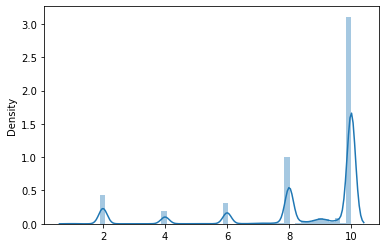

In [74]:
sns.distplot(x=df["score"])

C. Round off scores to the nearest integers.

In [75]:
# using round function
df['score'] = round(df['score']) 
df.score.head(2)

0    10.0
1    10.0
Name: score, dtype: float64

D. Check for missing values. Impute the missing values, if any.

In [76]:
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        41095
score_max    41095
extract      14880
author       16345
product          0
dtype: int64

In [77]:
# Imputing the missing values through sklearn's Simple Imputer.
# For 'score' feature which is float type we will impute it with the rounded mean to the nearest integer.
# For Object features like "extract & 'author' with most commonly occuring values.
from sklearn.impute import SimpleImputer 
for i in df.columns:
    if df[i].dtypes != 'object':
        imputer = SimpleImputer(missing_values=np.nan, fill_value=round(df['score'].mean()))
        imputer = imputer.fit(df[[i]])
        df[i] = imputer.transform(df[[i]])   
    else:
        imputer = SimpleImputer(missing_values=np.nan, strategy = 'constant')
        imputer = imputer.fit(df[[i]])
        df[i] = imputer.transform(df[[i]])

E. Check for duplicate values and remove them, if any.

In [78]:
print(df.duplicated().sum())

1500849


In [79]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

F. Keep only 1 Million data samples. Use random state=612.

In [80]:
import random
samples = df.sample(n=1000000,random_state=612,replace=True)
samples

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
168026,/cellphones/microsoft-lumia-640-dual-sim/,8/21/2015,it,it,Amazon,amazon.it,10.0,10.0,L'ho usato per 10 giorni perchÃ© avevo il Sony...,Daniel Alexandru,"Microsoft Lumia 640 LTE RM 1072 Smartphone, Ma..."
266939,/cellphones/apple-iphone-6/,4/11/2016,ru,ru,Yandex,market.yandex.ru,10.0,10.0,"ÐÑ Ð¸ ÑÐ¾, ÑÑÐ¾ Ð´ÑÐ¼Ð°Ñ Ð½Ðµ Ð¸ÑÐºÐ¾Ñ...",ÐÐ°ÑÐµÐ½ÑÐ¾Ð²Ð° ÐÐ»ÐµÐ½Ð°,Apple iPhone 6 16Gb
211780,/cellphones/blackberry-passport/,12/12/2014,en,us,Amazon,amazon.com,6.0,10.0,The reason why this device received a 3 is not...,Amazon Customer,BlackBerry Passport - Factory Unlocked Smartph...
187149,/cellphones/sony-xperia-x-performance-f8131/,3/15/2017,en,us,B&H Photo,bhphotovideo.com,10.0,10.0,This product arrived faster than I thought it ...,Mary,Sony Xperia X Performance F8131 32GB Smartphon...
336475,/cellphones/motorola-moto-g/,5/28/2014,es,es,Amazon,amazon.es,10.0,10.0,"Muy buena relaciÃ³n calidad precio, va fenomen...",JOANNA LAVIN OTI,Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Of...
...,...,...,...,...,...,...,...,...,...,...,...
52692,/cellphones/apple-iphone-7/,9/28/2016,en,in,InfiBeam,infibeam.com,10.0,10.0,The much awaited iPhone!!! What brilliant feat...,Nihita,"Apple iPhone 7 (128GB, Rose Gold)"
342706,/cellphones/samsung-galaxy-s5/,6/12/2015,en,us,Samsung,samsung.com,10.0,10.0,I love everything about this phone. Has so man...,Rach817,Samsung Galaxy S5 16GB (Verizon)
298224,/cellphones/lenovo-vibe-x3/,2/19/2016,en,in,Amazon,amazon.in,10.0,10.0,Don't upgrade to marshmallow battery life will go,Suhaas,"Lenovo Vibe X3 (White, 32GB)"
253330,/cellphones/asus-zenfone-zoom/,9/5/2016,en,us,Amazon,amazon.com,2.0,10.0,"specs shows latest Intel Atom Z3590, Quad-core...",RT,"Asus ZenFone Zoom ZX551ML 5.5"" Unlocked LTE 4G..."


In [81]:
df=samples

G. Drop irrelevant features. Keep features like Author, Product, and Score.

In [82]:
df.drop(labels = ['phone_url','date','lang','country','source','domain','score_max','extract'],axis=1,inplace=True)

**<center>2. Answer the following questions.</center>**

A. Identify the most rated products

In [83]:
# value_counts will give how many times product is rated.(present in df)
most_rated = pd.DataFrame(df['product'].value_counts()) 

# top 10 most rated products.
most_rated.head(10) 

,product
"OnePlus 3 (Graphite, 64 GB)",11048
"OnePlus 3 (Soft Gold, 64 GB)",9558
Huawei P8lite zwart / 16 GB,7262
Samsung Galaxy S6 zwart / 32 GB,6004
"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)",5054
Samsung Galaxy J3 (8GB),4923
Samsung Galaxy S7 edge 32GB (Verizon),4832
Samsung Galaxy S7 edge 32GB (T-Mobile),4625
Samsung Galaxy S6 edge zwart / 32 GB,4605
"Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]",4560


B. Identify the users with most number of reviews.

In [84]:
# value_counts will give the no. of times a user has arrived in df.author
most_reviews = pd.DataFrame(df['author'].value_counts()) 

# top 10 users with most no. of reviews
most_reviews.head(10) 

,author
Amazon Customer,87296
Cliente Amazon,35699
Client d'Amazon,14704
e-bit,13916
missing_value,8657
Amazon Kunde,7425
einer Kundin,6153
einem Kunden,4640
Anonymous,3255
unknown,3106


C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final 
dataset.

In [85]:
# no. of times a product has arrived in df.product more that 50 times.
x = df['product'].value_counts()>50 

y = x[x].index       # geting df with products that have been rated more than 50 times.
df = df[df['product'].isin(y)]

In [86]:
# df = df[df['product'].isin(most_rated[most_rated>50].index)]

In [87]:
# no. of times a user has arrived in df.author more that 50 times.
a = df['author'].value_counts()>50
b = a[a].index                     # geting df with author that have been rated more than 50 times
df = df[df['author'].isin(b)]

In [88]:
# df = df[df['author'].isin(most_reviews[most_reviews>50].index)]

In [89]:
# df with author that have been rated more than 50 times and with products that have been rated more than 50 times.
pd.DataFrame(df['author'].value_counts())   

,author
Amazon Customer,80695
Cliente Amazon,30580
e-bit,13528
Client d'Amazon,12523
missing_value,6788
...,...
Abhinav,51
Dominik,51
francesca,51
Kindle-Kunde,51


In [90]:
df_cf = df.copy() 

**<center>3. Build a popularity based model and recommend top 5 mobile phones.</center>**

In [91]:
# popularity based  model is just a set of products with their corresponding mean rating in a decending order. 
Popular = pd.DataFrame(df.groupby('product')['score'].mean().sort_values(ascending=False))
Popular.head(2)

,score
product,
×××¤×× ×¡××××¨× Xiaomi Redmi Note 4 64GB,10.0
Samsung Galaxy S8+ 64GB (Sprint),10.0


In [92]:
# from this set we can get the top most highly rated (popular) products.

Recommend_top_N = 5 

df_recomm = Popular.iloc[:Recommend_top_N,0:1] # create df with only top N products

# get products according to their rank in df.
count = 1
for Product in df_recomm.index: 
    print("""
----------------------------------------------{}------------------------------------------------------
{}
""".format(count,Product))
    count+=1


----------------------------------------------1------------------------------------------------------
×××¤×× ×¡××××¨× Xiaomi Redmi Note 4 64GB


----------------------------------------------2------------------------------------------------------
Samsung Galaxy S8+ 64GB (Sprint)


----------------------------------------------3------------------------------------------------------
SAMSUNG Galaxy S5 - blanc - Smartphone


----------------------------------------------4------------------------------------------------------
Sim Free Apple iPhone 6s 64GB Mobile Phone - Gold


----------------------------------------------5------------------------------------------------------
Sim Free Apple iPhone 6s 32GB Mobile Phone - Space Grey



**4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.**

In [93]:
#encoding the 'auther' and 'product' features.
df_ref = df_cf.copy()

encoder = LabelEncoder()
df_cf['author'] = encoder.fit_transform(df_cf['author'])
df_cf['product'] = encoder.fit_transform(df_cf['product'])

print(df_cf.head(2))

        score  author  product
211780    6.0      31      493
247252   10.0     444     1823


In [94]:
#creating Dataframe for reference. contains user,item as well as their encodings.
df_ref['author_encode'] = df_cf['author']
df_ref['product_encode'] = df_cf['product']
print(df_ref['author_encode'].nunique())
print(df_ref['product_encode'].nunique())
df_ref.head(2)

600
3083


,score,author,product,author_encode,product_encode
211780,6.0,Amazon Customer,BlackBerry Passport - Factory Unlocked Smartph...,31,493
247252,10.0,Valerio,"Samsung G360 Galaxy Core Prime Smartphone, 8 G...",444,1823


In [95]:
# Preparing the dataset for surprise library.
reader = Reader(rating_scale=(1,10)) # using reader function is used toused to parse a file containing ratings.
data = Dataset.load_from_df(df_cf[['author', 'product', 'score']], reader) # creating the Dataset from df.

In [96]:
# creating train and test set.
trainset, testset = train_test_split(data, test_size=.15) 

In [97]:
#building SVD 
algo_svd = SVD() # calling SVD from surprise library.
algo_svd.fit(trainset) # training model.

In [98]:
#testing the SVD model using testset.
predictions = algo_svd.test(testset) # Predicting the score for testset users.

print(accuracy.rmse(predictions)) 

RMSE: 2.2465
2.2464601943975158


In [99]:
# Build a collaborative filtering model using kNNWithMeans from surprise.
# User Based collaborative filtering model & cosine similarity as similarity metric.
algo = KNNWithMeans(k=50, sim_options={'name': "cosine", 'user_based': True},verbose = True) 
algo.fit(trainset) # training model

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [100]:
# item Based collaborative filtering model & cosine similarity as similarity metric.
data_item = df_cf.sample(n=100000,random_state=612,replace=True)

reader = Reader(rating_scale=(1,10))
data_item = Dataset.load_from_df(data_item[['author', 'product', 'score']], reader)

trainset1, testset1 = train_test_split(data_item, test_size=.15) 

algo = KNNWithMeans(k=50, sim_options={'name': "cosine", 'user_based': False},verbose = True)
algo.fit(trainset1)

Computing the cosine similarity matrix...
Done computing similarity matrix.


**<center>5. Evaluate the collaborative model. Print RMSE value.</center>** 

In [101]:
# For evaluation we can use RMSE.- user based
test_pred = algo.test(testset)  # predict the score for testset

# To find RMSE, we can use build in method accuracy from surprise library
print(accuracy.rmse(test_pred,verbose =True))

RMSE: 2.4300
2.429990172393237


In [102]:
# For evaluation we can use RMSE. - item based
test_pred_item = algo.test(testset1)

print(accuracy.rmse(test_pred_item,verbose =True))

RMSE: 2.4154
2.415399107796616


**<center>6. Predict score (average rating) for test users.</center>** 

In [103]:
users = [x for x in set(x for x in df_ref['author_encode'])] # list of all users
items = [x for x in set(x for x in df_ref['product_encode'])] # list of all items

test_users = random.sample(users,k=50) # selecting 50 random test users 
test_item = random.sample(items,k=1) # selecting 1 random test item.

# predicting the score(rating) by 50 test users for the same item.
for user in test_users:
    print(algo.predict(user,test_item[0]))

user: 122        item: 1838       r_ui = None   est = 9.48   {'actual_k': 50, 'was_impossible': False}
user: 34         item: 1838       r_ui = None   est = 9.65   {'actual_k': 0, 'was_impossible': False}
user: 386        item: 1838       r_ui = None   est = 6.22   {'actual_k': 1, 'was_impossible': False}
user: 177        item: 1838       r_ui = None   est = 9.62   {'actual_k': 15, 'was_impossible': False}
user: 351        item: 1838       r_ui = None   est = 10.00   {'actual_k': 15, 'was_impossible': False}
user: 364        item: 1838       r_ui = None   est = 10.00   {'actual_k': 12, 'was_impossible': False}
user: 33         item: 1838       r_ui = None   est = 9.65   {'actual_k': 0, 'was_impossible': False}
user: 505        item: 1838       r_ui = None   est = 9.40   {'actual_k': 16, 'was_impossible': False}
user: 503        item: 1838       r_ui = None   est = 8.14   {'actual_k': 16, 'was_impossible': False}
user: 426        item: 1838       r_ui = None   est = 9.65   {'actual_k': 

In [104]:
# predictions for testset.
for i in test_pred:
    print(f"userId {i[0]}",f"Predicted score {i[3]}")

userId 258 Predicted score 8.230303422612435
userId 55 Predicted score 9.44186046511628
userId 31 Predicted score 8.64
userId 93 Predicted score 9.200000000000001
userId 94 Predicted score 8.776202034109007
userId 31 Predicted score 8.0
userId 483 Predicted score 9.08
userId 275 Predicted score 8.525547446136473
userId 31 Predicted score 8.824375419803342
userId 31 Predicted score 7.632197937842155
userId 347 Predicted score 9.778169011013558
userId 443 Predicted score 9.398769118975132
userId 484 Predicted score 9.4
userId 596 Predicted score 8.972860322755091
userId 242 Predicted score 6.989425538020486
userId 31 Predicted score 8.32
userId 304 Predicted score 9.266073018702587
userId 94 Predicted score 8.807007304758292
userId 31 Predicted score 8.942748706342938
userId 156 Predicted score 8.257514145722267
userId 483 Predicted score 8.96
userId 94 Predicted score 6.224168290352989
userId 124 Predicted score 9.258234555628619
userId 238 Predicted score 9.594788476018483
userId 483 P

userId 58 Predicted score 8.008313263551887
userId 241 Predicted score 7.602001780514588
userId 484 Predicted score 9.539504236842403
userId 31 Predicted score 9.01936492326679
userId 93 Predicted score 7.220284040749565
userId 32 Predicted score 8.683842278669932
userId 31 Predicted score 9.014837507217223
userId 485 Predicted score 9.88
userId 26 Predicted score 8.869041634598505
userId 93 Predicted score 3.3376809184766123
userId 40 Predicted score 9.281650894308582
userId 525 Predicted score 10
userId 31 Predicted score 5.883494252842815
userId 164 Predicted score 7.729491223248029
userId 31 Predicted score 8.32
userId 253 Predicted score 9.584380010069967
userId 423 Predicted score 9.31917636683425
userId 93 Predicted score 6.7868018007068205
userId 40 Predicted score 8.479091112191636
userId 483 Predicted score 9.16
userId 31 Predicted score 7.08
userId 22 Predicted score 9.382680307921012
userId 31 Predicted score 6.027673831339428
userId 94 Predicted score 7.84
userId 94 Predic

userId 31 Predicted score 6.274448476496445
userId 483 Predicted score 8.630462599958603
userId 105 Predicted score 6.321577614858202
userId 31 Predicted score 7.919999999999999
userId 91 Predicted score 8.358388348779638
userId 573 Predicted score 7.916708034409606
userId 483 Predicted score 9.08
userId 31 Predicted score 5.217483099162258
userId 93 Predicted score 9.176374212062886
userId 94 Predicted score 9.59987576842126
userId 31 Predicted score 7.12
userId 172 Predicted score 8.893714428543534
userId 31 Predicted score 7.3469758304016795
userId 141 Predicted score 5.587871207096885
userId 537 Predicted score 9.842482750718757
userId 31 Predicted score 7.2560663483193
userId 31 Predicted score 7.04
userId 120 Predicted score 7.658299156243205
userId 184 Predicted score 7.773916105695632
userId 31 Predicted score 8.32
userId 31 Predicted score 8.4
userId 32 Predicted score 7.268104026925455
userId 483 Predicted score 9.438021082276235
userId 32 Predicted score 7.837872060060614
us

userId 58 Predicted score 5.013925845989805
userId 31 Predicted score 8.8
userId 31 Predicted score 6.28
userId 94 Predicted score 8.280573367740281
userId 31 Predicted score 8.8
userId 525 Predicted score 7.92514657751826
userId 31 Predicted score 8.163102105958222
userId 483 Predicted score 9.475722198337863
userId 551 Predicted score 9.48
userId 93 Predicted score 9.200000000000001
userId 31 Predicted score 6.52
userId 93 Predicted score 7.72
userId 290 Predicted score 8.053204785231264
userId 94 Predicted score 8.88
userId 485 Predicted score 8.84
userId 31 Predicted score 6.584440653960075
userId 94 Predicted score 7.977978657829044
userId 93 Predicted score 8.0
userId 419 Predicted score 8.829127330678572
userId 31 Predicted score 6.876751512549519
userId 31 Predicted score 6.76
userId 106 Predicted score 9.321033546622598
userId 31 Predicted score 6.72
userId 31 Predicted score 3.485011548808599
userId 32 Predicted score 8.365636982851205
userId 483 Predicted score 9.0
userId 36

userId 94 Predicted score 8.32
userId 31 Predicted score 6.030249814172022
userId 484 Predicted score 9.507909705452473
userId 31 Predicted score 6.52
userId 551 Predicted score 9.48
userId 31 Predicted score 5.27137150203493
userId 31 Predicted score 7.880000000000001
userId 112 Predicted score 9.489352037172301
userId 275 Predicted score 7.93492025633982
userId 31 Predicted score 8.8
userId 114 Predicted score 7.976510616431178
userId 31 Predicted score 6.104325167156525
userId 31 Predicted score 8.4
userId 23 Predicted score 8.88438285280482
userId 262 Predicted score 8.660742367506728
userId 399 Predicted score 9.23684863398519
userId 31 Predicted score 8.65888252796857
userId 31 Predicted score 7.36
userId 31 Predicted score 4.6827928218617
userId 32 Predicted score 9.19778769221701
userId 158 Predicted score 8.141245610022528
userId 314 Predicted score 6.879641499208545
userId 484 Predicted score 9.4
userId 398 Predicted score 10
userId 55 Predicted score 9.42
userId 551 Predicte

userId 525 Predicted score 9.547981118009105
userId 55 Predicted score 8.653846153846153
userId 31 Predicted score 7.2560663483193
userId 94 Predicted score 8.91631214343548
userId 31 Predicted score 7.12
userId 316 Predicted score 8.454853239503974
userId 93 Predicted score 8.336036491894685
userId 207 Predicted score 7.728570534560138
userId 483 Predicted score 8.8
userId 179 Predicted score 10
userId 173 Predicted score 8.81549719211193
userId 94 Predicted score 8.492562117613604
userId 54 Predicted score 6.873903906959164
userId 320 Predicted score 8.372162993451804
userId 32 Predicted score 8.716641551397032
userId 31 Predicted score 7.0895199411902246
userId 483 Predicted score 8.96
userId 31 Predicted score 9.014837507217223
userId 31 Predicted score 7.570714386356116
userId 485 Predicted score 9.88
userId 484 Predicted score 9.663138082780035
userId 31 Predicted score 6.52
userId 93 Predicted score 5.670140367113692
userId 195 Predicted score 8.322210476329333
userId 493 Predic

userId 94 Predicted score 8.56
userId 31 Predicted score 8.56
userId 593 Predicted score 9.483118607834898
userId 485 Predicted score 9.574725566452823
userId 94 Predicted score 9.014436103618838
userId 483 Predicted score 8.84
userId 31 Predicted score 8.32
userId 94 Predicted score 7.494679946817218
userId 31 Predicted score 7.763237029452736
userId 484 Predicted score 9.72
userId 31 Predicted score 7.92
userId 31 Predicted score 8.8
userId 55 Predicted score 9.571428571428571
userId 31 Predicted score 8.2
userId 40 Predicted score 9.282741791893171
userId 31 Predicted score 9.72303558596873
userId 527 Predicted score 9.513897447852495
userId 441 Predicted score 8.846097225462755
userId 484 Predicted score 9.507909705452473
userId 31 Predicted score 8.8
userId 165 Predicted score 8.358208649793017
userId 242 Predicted score 7.917602996254681
userId 93 Predicted score 8.465199249300017
userId 31 Predicted score 8.56
userId 31 Predicted score 8.955397732145878
userId 152 Predicted scor

userId 483 Predicted score 8.84
userId 94 Predicted score 8.301059213516238
userId 371 Predicted score 8.965935575198012
userId 17 Predicted score 7.8329047772887375
userId 152 Predicted score 9.041676775049469
userId 461 Predicted score 8.869452378164496
userId 31 Predicted score 6.84
userId 93 Predicted score 9.072529296243278
userId 525 Predicted score 7.845128132405758
userId 316 Predicted score 10
userId 93 Predicted score 9.52
userId 31 Predicted score 9.507021432600961
userId 94 Predicted score 8.244378479818701
userId 31 Predicted score 7.28
userId 55 Predicted score 9.285714285714286
userId 94 Predicted score 8.69234845397307
userId 400 Predicted score 8.014607039537532
userId 485 Predicted score 8.84
userId 32 Predicted score 6.62009740392791
userId 31 Predicted score 6.76
userId 572 Predicted score 7.618468224705132
userId 94 Predicted score 8.0
userId 245 Predicted score 8.783761121730764
userId 93 Predicted score 7.594703177179683
userId 31 Predicted score 8.8
userId 31 Pr

userId 368 Predicted score 6.69073566918749
userId 525 Predicted score 8.910855915376676
userId 23 Predicted score 9.250204805201367
userId 510 Predicted score 9.479577097486265
userId 485 Predicted score 9.72
userId 439 Predicted score 8.623193493354687
userId 32 Predicted score 7.268104026925455
userId 31 Predicted score 7.916809348355205
userId 288 Predicted score 8.925602566206656
userId 555 Predicted score 8.366444374252126
userId 31 Predicted score 6.72
userId 239 Predicted score 9.31881157646172
userId 31 Predicted score 8.2
userId 31 Predicted score 5.197403672647497
userId 31 Predicted score 8.647585965287908
userId 31 Predicted score 7.08
userId 94 Predicted score 2.0482037332577705
userId 31 Predicted score 8.32
userId 266 Predicted score 8.996311199230544
userId 438 Predicted score 8.418641895720153
userId 328 Predicted score 4.853307809906465
userId 31 Predicted score 7.52
userId 94 Predicted score 8.56
userId 31 Predicted score 8.6
userId 31 Predicted score 8.721520884995

userId 503 Predicted score 7.062597406532771
userId 311 Predicted score 6.889815086513392
userId 100 Predicted score 8.868524226592701
userId 93 Predicted score 9.862304286658805
userId 385 Predicted score 7.469690883592417
userId 525 Predicted score 8.943693720601607
userId 525 Predicted score 7.580595570490895
userId 525 Predicted score 7.285714285714286
userId 483 Predicted score 8.96
userId 485 Predicted score 9.638276565267986
userId 158 Predicted score 8.720492185580103
userId 31 Predicted score 7.92
userId 31 Predicted score 8.48
userId 31 Predicted score 9.0
userId 31 Predicted score 7.329316347794439
userId 32 Predicted score 7.999999999999999
userId 31 Predicted score 7.28
userId 124 Predicted score 9.109385720781349
userId 31 Predicted score 6.640000000000001
userId 31 Predicted score 8.41374549688469
userId 31 Predicted score 7.76
userId 31 Predicted score 10
userId 410 Predicted score 8.459640198278207
userId 94 Predicted score 7.517235280570785
userId 485 Predicted score 

userId 5 Predicted score 7.392251647462369
userId 496 Predicted score 8.517725808956447
userId 161 Predicted score 9.737208397175054
userId 94 Predicted score 9.67069622558229
userId 58 Predicted score 9.741429654122985
userId 551 Predicted score 7.120000000000001
userId 409 Predicted score 8.636470262718667
userId 93 Predicted score 6.897068937149539
userId 94 Predicted score 8.360000000000001
userId 184 Predicted score 8.787528244631146
userId 31 Predicted score 8.56
userId 574 Predicted score 9.24889789013689
userId 283 Predicted score 9.003676365149778
userId 31 Predicted score 8.32
userId 228 Predicted score 8.162781607839227
userId 338 Predicted score 8.855644097676134
userId 483 Predicted score 8.32
userId 483 Predicted score 9.791840388889794
userId 325 Predicted score 8.710730805861528
userId 483 Predicted score 9.832496921347149
userId 31 Predicted score 6.2
userId 77 Predicted score 9.075079498419507
userId 31 Predicted score 8.32
userId 93 Predicted score 7.698618485167735


userId 298 Predicted score 9.345654277367967
userId 483 Predicted score 9.068834023169305
userId 31 Predicted score 6.28
userId 31 Predicted score 7.64
userId 110 Predicted score 9.555490614680238
userId 31 Predicted score 7.4623602795348285
userId 94 Predicted score 7.92
userId 322 Predicted score 7.833299609663939
userId 141 Predicted score 8.739488931711758
userId 31 Predicted score 8.64
userId 483 Predicted score 9.64
userId 94 Predicted score 8.360000000000001
userId 94 Predicted score 8.44
userId 31 Predicted score 7.12
userId 483 Predicted score 9.24
userId 472 Predicted score 8.047580366933664
userId 31 Predicted score 8.8
userId 101 Predicted score 9.028267835860454
userId 32 Predicted score 6.7144421822049445
userId 94 Predicted score 7.84
userId 484 Predicted score 9.539504236842403
userId 146 Predicted score 8.574772783318535
userId 31 Predicted score 7.588006897220892
userId 332 Predicted score 8.994530012864267
userId 31 Predicted score 8.48
userId 93 Predicted score 8.69

userId 31 Predicted score 7.28
userId 484 Predicted score 9.44
userId 525 Predicted score 9.654705621206235
userId 215 Predicted score 8.268060309045625
userId 452 Predicted score 9.823052107161084
userId 94 Predicted score 9.2
userId 31 Predicted score 7.466691324090639
userId 32 Predicted score 7.234442459375108
userId 47 Predicted score 8.617951861498458
userId 159 Predicted score 7.351018826768038
userId 302 Predicted score 8.964903701305225
userId 31 Predicted score 7.28
userId 31 Predicted score 8.64
userId 69 Predicted score 10
userId 548 Predicted score 7.019257852624037
userId 484 Predicted score 9.64
userId 31 Predicted score 10
userId 21 Predicted score 9.329698104965967
userId 94 Predicted score 8.326866254726607
userId 58 Predicted score 7.030041094634746
userId 525 Predicted score 9.168349653194396
userId 31 Predicted score 8.32
userId 114 Predicted score 9.427938596810002
userId 31 Predicted score 7.32
userId 592 Predicted score 7.737945180259617
userId 31 Predicted scor

userId 31 Predicted score 7.160000000000001
userId 93 Predicted score 5.37526637633564
userId 94 Predicted score 7.797228649088546
userId 31 Predicted score 8.321535660656458
userId 7 Predicted score 8.270168973543713
userId 483 Predicted score 9.076769955047158
userId 94 Predicted score 9.118386397199027
userId 93 Predicted score 10
userId 84 Predicted score 8.009711366528203
userId 31 Predicted score 8.32
userId 32 Predicted score 7.640000000000001
userId 32 Predicted score 8.118016812929232
userId 31 Predicted score 6.52
userId 31 Predicted score 9.433343819565911
userId 485 Predicted score 9.6
userId 94 Predicted score 9.630017769845828
userId 370 Predicted score 9.084885344779565
userId 525 Predicted score 7.3558296918767505
userId 239 Predicted score 10
userId 31 Predicted score 7.92
userId 59 Predicted score 9.31686051138408
userId 433 Predicted score 8.99166153107671
userId 525 Predicted score 8.943693720601607
userId 32 Predicted score 5.734143169873926
userId 31 Predicted sco

userId 484 Predicted score 9.68
userId 31 Predicted score 8.32
userId 93 Predicted score 9.019607465018623
userId 31 Predicted score 6.858967671822482
userId 93 Predicted score 7.72
userId 94 Predicted score 8.56
userId 395 Predicted score 7.435678030159884
userId 94 Predicted score 9.12
userId 31 Predicted score 8.070485833635418
userId 484 Predicted score 9.44
userId 31 Predicted score 8.4
userId 483 Predicted score 8.84
userId 31 Predicted score 8.32
userId 78 Predicted score 6.991050714182912
userId 31 Predicted score 7.099490560327122
userId 31 Predicted score 7.52
userId 146 Predicted score 8.55287142414962
userId 382 Predicted score 9.722353260112474
userId 94 Predicted score 9.725866919178054
userId 31 Predicted score 5.674120879651153
userId 485 Predicted score 8.84
userId 385 Predicted score 9.2298896317604
userId 94 Predicted score 9.60777078929056
userId 539 Predicted score 8.97320635729222
userId 238 Predicted score 6.394031828930995
userId 281 Predicted score 8.3578600476

userId 31 Predicted score 6.990479119169636
userId 24 Predicted score 8.551705214899494
userId 93 Predicted score 8.55162175657973
userId 31 Predicted score 8.32
userId 31 Predicted score 7.160000000000001
userId 32 Predicted score 7.082682651955265
userId 31 Predicted score 3.484724238235949
userId 31 Predicted score 5.436448692097923
userId 109 Predicted score 8.427082846184888
userId 490 Predicted score 9.132943556307088
userId 114 Predicted score 10
userId 483 Predicted score 9.16
userId 400 Predicted score 6.1647769725831285
userId 93 Predicted score 8.518548480431866
userId 525 Predicted score 6.99409843810827
userId 484 Predicted score 9.663138082780035
userId 94 Predicted score 10
userId 354 Predicted score 9.824511234328913
userId 93 Predicted score 4.196419237775203
userId 485 Predicted score 8.84
userId 483 Predicted score 9.24
userId 483 Predicted score 8.96
userId 241 Predicted score 5.0560771589460005
userId 94 Predicted score 9.673827398481436
userId 99 Predicted score 7

userId 298 Predicted score 8.511745283754538
userId 93 Predicted score 9.152131515850737
userId 31 Predicted score 5.309502300754124
userId 31 Predicted score 6.640000000000001
userId 93 Predicted score 7.56
userId 31 Predicted score 6.008807844078163
userId 508 Predicted score 9.23297727701112
userId 32 Predicted score 6.744674233266889
userId 31 Predicted score 8.877178191571677
userId 232 Predicted score 9.182197644640805
userId 158 Predicted score 8.13198442831976
userId 54 Predicted score 9.977872485120987
userId 503 Predicted score 8.185471346390539
userId 525 Predicted score 8.222222222222221
userId 483 Predicted score 9.16
userId 94 Predicted score 8.16
userId 31 Predicted score 9.726745026972429
userId 385 Predicted score 9.29169155821383
userId 94 Predicted score 9.12
userId 31 Predicted score 6.640000000000001
userId 31 Predicted score 7.48
userId 31 Predicted score 7.28
userId 31 Predicted score 8.8
userId 31 Predicted score 6.617416351005142
userId 94 Predicted score 7.92


userId 91 Predicted score 7.890593343597903
userId 209 Predicted score 9.798228448498019
userId 99 Predicted score 10
userId 485 Predicted score 9.638276565267986
userId 31 Predicted score 9.608782628760608
userId 358 Predicted score 9.096172523042354
userId 94 Predicted score 8.0
userId 31 Predicted score 8.32
userId 31 Predicted score 7.048052594540965
userId 31 Predicted score 8.32
userId 366 Predicted score 8.358679241149526
userId 31 Predicted score 6.8
userId 31 Predicted score 7.28
userId 31 Predicted score 6.12
userId 31 Predicted score 7.160000000000001
userId 578 Predicted score 8.27062673405979
userId 32 Predicted score 8.15838926392898
userId 31 Predicted score 7.36
userId 485 Predicted score 9.88
userId 94 Predicted score 9.12
userId 312 Predicted score 8.525121040213868
userId 31 Predicted score 7.6971011714133555
userId 31 Predicted score 8.4
userId 31 Predicted score 7.92
userId 94 Predicted score 8.64
userId 93 Predicted score 4.939834794746157
userId 31 Predicted scor

userId 94 Predicted score 8.96
userId 31 Predicted score 7.657952575727899
userId 31 Predicted score 9.289863224623065
userId 93 Predicted score 2.9155783536615663
userId 483 Predicted score 9.44
userId 31 Predicted score 6.36
userId 31 Predicted score 10
userId 483 Predicted score 8.64
userId 31 Predicted score 8.8
userId 99 Predicted score 9.278660092748302
userId 390 Predicted score 9.126490522198798
userId 186 Predicted score 9.244319835305202
userId 93 Predicted score 8.647781402608876
userId 54 Predicted score 6.736313371589916
userId 262 Predicted score 7.294800236599
userId 31 Predicted score 8.48
userId 556 Predicted score 8.630571669473575
userId 268 Predicted score 9.264734169058704
userId 519 Predicted score 8.504293211987521
userId 31 Predicted score 8.32
userId 31 Predicted score 8.32
userId 533 Predicted score 9.052981719526702
userId 483 Predicted score 9.08
userId 31 Predicted score 9.437211554851771
userId 93 Predicted score 8.647781402608876
userId 31 Predicted score

userId 31 Predicted score 7.142506773283673
userId 525 Predicted score 8.723414424671194
userId 500 Predicted score 9.274467316142166
userId 94 Predicted score 9.245580635614896
userId 302 Predicted score 8.171179025650417
userId 76 Predicted score 7.951723900374002
userId 115 Predicted score 9.897818606678213
userId 413 Predicted score 9.293075885916524
userId 31 Predicted score 7.4799999999999995
userId 483 Predicted score 8.56
userId 318 Predicted score 9.2839343261496
userId 94 Predicted score 8.2
userId 31 Predicted score 6.52
userId 55 Predicted score 9.543478260869565
userId 55 Predicted score 9.0
userId 32 Predicted score 6.537831856212492
userId 581 Predicted score 7.774574842465569
userId 31 Predicted score 8.8
userId 290 Predicted score 8.980295029010163
userId 13 Predicted score 8.390755830224553
userId 94 Predicted score 9.260161303810609
userId 85 Predicted score 10
userId 483 Predicted score 8.84
userId 31 Predicted score 8.8
userId 364 Predicted score 7.562230887425769


userId 94 Predicted score 8.96
userId 229 Predicted score 7.951347793574625
userId 42 Predicted score 7.328669372539147
userId 94 Predicted score 9.24
userId 31 Predicted score 9.194569480523903
userId 485 Predicted score 9.2
userId 272 Predicted score 8.934922285365664
userId 73 Predicted score 8.16675380405219
userId 31 Predicted score 8.44
userId 35 Predicted score 9.362373492859346
userId 462 Predicted score 6.7181550737117846
userId 406 Predicted score 10
userId 383 Predicted score 8.783608353634298
userId 31 Predicted score 7.52
userId 61 Predicted score 8.645965007720953
userId 31 Predicted score 6.28
userId 94 Predicted score 8.72
userId 31 Predicted score 8.2
userId 31 Predicted score 7.28
userId 348 Predicted score 5.387438875969996
userId 483 Predicted score 8.988054270993178
userId 31 Predicted score 8.024152955542025
userId 31 Predicted score 8.8
userId 94 Predicted score 9.499585448883638
userId 94 Predicted score 8.297321527266872
userId 435 Predicted score 5.45871686891

userId 286 Predicted score 8.694571577950308
userId 94 Predicted score 8.35617450307642
userId 31 Predicted score 6.988970402554609
userId 94 Predicted score 8.958054057389054
userId 379 Predicted score 8.815429479522438
userId 31 Predicted score 7.963770729403196
userId 31 Predicted score 6.28
userId 31 Predicted score 7.28
userId 175 Predicted score 9.422419769867181
userId 31 Predicted score 7.28
userId 551 Predicted score 9.72
userId 31 Predicted score 6.820111557286266
userId 572 Predicted score 8.485258465952482
userId 94 Predicted score 5.509143168901978
userId 94 Predicted score 9.023160930982147
userId 94 Predicted score 9.023160930982147
userId 395 Predicted score 7.763732194602181
userId 31 Predicted score 6.04
userId 31 Predicted score 8.2
userId 93 Predicted score 9.447220308618167
userId 463 Predicted score 9.276434165496473
userId 31 Predicted score 5.890012792668931
userId 251 Predicted score 4.25690219353325
userId 81 Predicted score 7.824922161558016
userId 31 Predict

userId 94 Predicted score 8.297321527266872
userId 485 Predicted score 9.88
userId 31 Predicted score 8.393944668105902
userId 484 Predicted score 9.72
userId 115 Predicted score 9.109791600448453
userId 31 Predicted score 7.04
userId 31 Predicted score 8.012038473794664
userId 329 Predicted score 8.868714415642117
userId 483 Predicted score 8.56
userId 353 Predicted score 9.051944659057181
userId 194 Predicted score 8.789127385205822
userId 31 Predicted score 7.306281717323375
userId 31 Predicted score 7.88
userId 353 Predicted score 9.673188090399336
userId 93 Predicted score 7.36
userId 94 Predicted score 8.152653792760475
userId 220 Predicted score 9.991361129229317
userId 485 Predicted score 9.6
userId 589 Predicted score 9.006231957850321
userId 31 Predicted score 9.181651609763302
userId 31 Predicted score 7.08
userId 31 Predicted score 7.76
userId 272 Predicted score 8.67089429779802
userId 31 Predicted score 8.024278784411045
userId 31 Predicted score 7.36
userId 31 Predicted 

userId 31 Predicted score 8.48
userId 272 Predicted score 9.258101965114815
userId 31 Predicted score 10
userId 31 Predicted score 7.08
userId 470 Predicted score 10
userId 94 Predicted score 8.829991328766072
userId 484 Predicted score 9.72
userId 496 Predicted score 9.635794824243526
userId 483 Predicted score 8.84
userId 161 Predicted score 9.51865271460995
userId 483 Predicted score 8.64
userId 31 Predicted score 9.01936492326679
userId 94 Predicted score 8.138349501427982
userId 558 Predicted score 9.139648236315052
userId 31 Predicted score 7.6998088710623325
userId 116 Predicted score 8.692305465134037
userId 525 Predicted score 9.009024043714827
userId 31 Predicted score 8.230303422612435
userId 181 Predicted score 9.342945644463303
userId 94 Predicted score 9.91330717108978
userId 31 Predicted score 6.12
userId 31 Predicted score 7.92
userId 572 Predicted score 9.816287415057058
userId 483 Predicted score 9.0
userId 31 Predicted score 6.2
userId 93 Predicted score 5.9597349456

userId 31 Predicted score 8.32
userId 555 Predicted score 9.57530078577492
userId 483 Predicted score 9.88
userId 31 Predicted score 7.52
userId 94 Predicted score 9.023160930982147
userId 94 Predicted score 8.781777299394845
userId 32 Predicted score 9.615507182285674
userId 411 Predicted score 7.688466915699249
userId 32 Predicted score 7.856043900433288
userId 169 Predicted score 9.438465765363153
userId 94 Predicted score 9.47799071726553
userId 93 Predicted score 5.058178863582163
userId 31 Predicted score 8.8
userId 94 Predicted score 8.56
userId 31 Predicted score 8.8
userId 32 Predicted score 7.879614637497719
userId 94 Predicted score 9.653741494754536
userId 557 Predicted score 10
userId 113 Predicted score 9.057345647748496
userId 31 Predicted score 8.2
userId 485 Predicted score 9.76
userId 31 Predicted score 8.32
userId 521 Predicted score 8.606649226704164
userId 167 Predicted score 10
userId 31 Predicted score 7.08
userId 31 Predicted score 9.964221765070544
userId 78 Pr

userId 93 Predicted score 5.846632304015389
userId 297 Predicted score 9.179900480676167
userId 31 Predicted score 6.959999999999999
userId 525 Predicted score 9.792007145080692
userId 94 Predicted score 10
userId 196 Predicted score 9.64843917497766
userId 94 Predicted score 8.2
userId 31 Predicted score 6.76
userId 31 Predicted score 7.08
userId 31 Predicted score 6.28
userId 485 Predicted score 9.6
userId 31 Predicted score 7.76
userId 458 Predicted score 8.776081576515134
userId 146 Predicted score 8.697302633078424
userId 31 Predicted score 7.4799999999999995
userId 590 Predicted score 8.44003195932623
userId 31 Predicted score 6.64
userId 94 Predicted score 9.494891599424506
userId 342 Predicted score 7.878370552675991
userId 483 Predicted score 9.90661445405043
userId 54 Predicted score 6.736313371589916
userId 483 Predicted score 9.68
userId 93 Predicted score 6.588165128035255
userId 31 Predicted score 7.880000000000001
userId 31 Predicted score 7.119999999999999
userId 31 Pre

userId 31 Predicted score 7.3469758304016795
userId 31 Predicted score 7.88
userId 32 Predicted score 8.118016812929232
userId 483 Predicted score 9.08
userId 485 Predicted score 9.88
userId 31 Predicted score 9.338346055214112
userId 373 Predicted score 7.17939211370189
userId 3 Predicted score 9.102662471166543
userId 93 Predicted score 8.583240440923555
userId 413 Predicted score 8.86354468895904
userId 503 Predicted score 8.92901327118039
userId 32 Predicted score 6.940929526472242
userId 218 Predicted score 5.498641211955896
userId 31 Predicted score 6.425058192906801
userId 525 Predicted score 8.352845765201007
userId 31 Predicted score 6.04
userId 32 Predicted score 7.9514559277364665
userId 525 Predicted score 9.306142464757885
userId 31 Predicted score 8.32
userId 382 Predicted score 9.441834738372062
userId 31 Predicted score 8.268553254506594
userId 187 Predicted score 9.456499143239146
userId 94 Predicted score 7.005386922451713
userId 152 Predicted score 8.934472783591776


userId 1 Predicted score 6.751960273149534
userId 94 Predicted score 1.8870574803683005
userId 216 Predicted score 8.6272082981676
userId 94 Predicted score 7.96
userId 31 Predicted score 8.2
userId 551 Predicted score 9.438583120171412
userId 108 Predicted score 8.92310895002085
userId 31 Predicted score 7.160000000000001
userId 31 Predicted score 6.49496195244792
userId 31 Predicted score 7.28
userId 31 Predicted score 8.8
userId 31 Predicted score 4.97786258468264
userId 365 Predicted score 9.443543120984307
userId 31 Predicted score 6.6263792158102195
userId 31 Predicted score 7.12
userId 31 Predicted score 6.052616082112864
userId 279 Predicted score 8.587193107471233
userId 66 Predicted score 7.036254645183241
userId 93 Predicted score 7.262343997759991
userId 31 Predicted score 8.327679824169687
userId 348 Predicted score 9.547521744339134
userId 94 Predicted score 8.44
userId 94 Predicted score 7.84
userId 94 Predicted score 8.64
userId 32 Predicted score 7.301172825969
userId 

userId 115 Predicted score 8.398443954182643
userId 55 Predicted score 9.425
userId 93 Predicted score 7.733631901286631
userId 15 Predicted score 8.410333978446147
userId 94 Predicted score 9.39218194115801
userId 31 Predicted score 7.160000000000001
userId 31 Predicted score 7.521822867541375
userId 31 Predicted score 7.28
userId 483 Predicted score 8.691454584223404
userId 31 Predicted score 6.28
userId 31 Predicted score 8.8
userId 32 Predicted score 7.4
userId 31 Predicted score 8.64
userId 31 Predicted score 8.8
userId 485 Predicted score 9.56
userId 31 Predicted score 5.674120879651153
userId 419 Predicted score 8.709258680595404
userId 31 Predicted score 5.0241215442963485
userId 55 Predicted score 9.595238095238095
userId 31 Predicted score 7.52
userId 94 Predicted score 5.852673939236913
userId 31 Predicted score 9.507021432600961
userId 409 Predicted score 7.847084139592242
userId 238 Predicted score 8.253877818152194
userId 158 Predicted score 9.400638224120229
userId 483 P

userId 31 Predicted score 9.213373953121534
userId 31 Predicted score 9.0
userId 31 Predicted score 7.4799999999999995
userId 94 Predicted score 8.84
userId 31 Predicted score 6.879647003755025
userId 94 Predicted score 9.28
userId 42 Predicted score 9.537486464778285
userId 203 Predicted score 8.081423417793104
userId 31 Predicted score 8.32
userId 318 Predicted score 7.947956827127658
userId 483 Predicted score 9.08
userId 94 Predicted score 8.6
userId 164 Predicted score 9.104590012849732
userId 31 Predicted score 8.32
userId 94 Predicted score 8.72
userId 400 Predicted score 6.970068568712757
userId 485 Predicted score 9.76
userId 54 Predicted score 10
userId 31 Predicted score 8.2
userId 483 Predicted score 8.8
userId 483 Predicted score 9.19252151780236
userId 94 Predicted score 7.89262130034547
userId 94 Predicted score 7.84
userId 31 Predicted score 6.52
userId 94 Predicted score 8.301059213516238
userId 379 Predicted score 9.518655918254643
userId 483 Predicted score 8.3716992

userId 31 Predicted score 8.8
userId 484 Predicted score 9.44
userId 57 Predicted score 10
userId 31 Predicted score 8.8
userId 31 Predicted score 6.931315374394448
userId 94 Predicted score 9.017137734156352
userId 32 Predicted score 7.400000000000001
userId 484 Predicted score 9.4
userId 484 Predicted score 9.4
userId 555 Predicted score 9.57530078577492
userId 100 Predicted score 8.699763020779248
userId 94 Predicted score 8.96
userId 483 Predicted score 9.313456090098699
userId 483 Predicted score 9.16
userId 31 Predicted score 6.08
userId 483 Predicted score 8.8
userId 31 Predicted score 8.043052342269828
userId 551 Predicted score 9.4
userId 357 Predicted score 10
userId 470 Predicted score 10
userId 311 Predicted score 8.753038113454297
userId 592 Predicted score 9.129984425494634
userId 31 Predicted score 8.008981102463213
userId 31 Predicted score 6.28
userId 270 Predicted score 8.233027552610267
userId 31 Predicted score 8.32
userId 94 Predicted score 10
userId 93 Predicted s

userId 31 Predicted score 6.2
userId 32 Predicted score 7.400967357941262
userId 93 Predicted score 6.897068937149539
userId 257 Predicted score 10
userId 94 Predicted score 8.14203487980179
userId 483 Predicted score 9.2
userId 31 Predicted score 9.194569480523903
userId 31 Predicted score 9.01936492326679
userId 31 Predicted score 8.32
userId 318 Predicted score 8.578566057381614
userId 31 Predicted score 8.437191718194134
userId 21 Predicted score 9.526096818345618
userId 108 Predicted score 9.37971680387933
userId 93 Predicted score 7.088838842394227
userId 571 Predicted score 8.684158766738028
userId 347 Predicted score 8.972717847935483
userId 483 Predicted score 9.16
userId 484 Predicted score 9.68
userId 572 Predicted score 8.02792707862935
userId 94 Predicted score 8.297321527266872
userId 32 Predicted score 7.082682651955265
userId 94 Predicted score 7.284242750459178
userId 531 Predicted score 8.82302027865786
userId 436 Predicted score 9.674001713647588
userId 405 Predicted

userId 147 Predicted score 9.556329981448878
userId 31 Predicted score 7.3312086902471645
userId 483 Predicted score 9.68
userId 31 Predicted score 8.163102105958222
userId 490 Predicted score 8.004841347064188
userId 31 Predicted score 8.8
userId 94 Predicted score 8.96
userId 411 Predicted score 9.157018747870321
userId 565 Predicted score 7.850467831563791
userId 484 Predicted score 9.76
userId 31 Predicted score 3.7692048914734797
userId 31 Predicted score 7.4799999999999995
userId 25 Predicted score 7.804220684576517
userId 344 Predicted score 9.004173990603284
userId 31 Predicted score 7.84
userId 58 Predicted score 9.753962607007182
userId 31 Predicted score 9.247991594835133
userId 31 Predicted score 8.8
userId 75 Predicted score 8.14769511861575
userId 31 Predicted score 10
userId 485 Predicted score 9.6
userId 31 Predicted score 7.76
userId 592 Predicted score 9.316901577213905
userId 265 Predicted score 8.451010907889565
userId 31 Predicted score 7.08
userId 31 Predicted sco

userId 470 Predicted score 8.382113120941606
userId 512 Predicted score 9.17874624971623
userId 335 Predicted score 7.6175944520144
userId 483 Predicted score 8.84
userId 51 Predicted score 8.788707333239008
userId 31 Predicted score 6.41121669800428
userId 310 Predicted score 8.532307783613723
userId 522 Predicted score 8.738502693437797
userId 94 Predicted score 7.762465850279049
userId 152 Predicted score 9.726593935130342
userId 485 Predicted score 9.6
userId 94 Predicted score 9.24
userId 20 Predicted score 8.082551241385946
userId 94 Predicted score 8.36
userId 94 Predicted score 9.347311246406857
userId 234 Predicted score 7.879761357406184
userId 348 Predicted score 9.059384056910465
userId 63 Predicted score 7.39011219714808
userId 31 Predicted score 6.359999999999999
userId 94 Predicted score 8.6
userId 93 Predicted score 8.035688399494083
userId 115 Predicted score 10
userId 590 Predicted score 9.350371063922022
userId 576 Predicted score 10
userId 400 Predicted score 9.1850

userId 94 Predicted score 8.360000000000001
userId 31 Predicted score 8.816078447028138
userId 31 Predicted score 7.92
userId 302 Predicted score 8.76937801102504
userId 31 Predicted score 10
userId 31 Predicted score 8.8
userId 94 Predicted score 8.949771987635263
userId 94 Predicted score 7.96
userId 483 Predicted score 9.12
userId 483 Predicted score 8.8
userId 31 Predicted score 10
userId 316 Predicted score 8.229184254186562
userId 31 Predicted score 5.92
userId 344 Predicted score 9.675967435849397
userId 226 Predicted score 6.528871975715572
userId 55 Predicted score 9.5
userId 147 Predicted score 7.840108905087263
userId 211 Predicted score 8.63785317122602
userId 31 Predicted score 6.634741517525344
userId 94 Predicted score 8.859602704856602
userId 580 Predicted score 9.210583044007057
userId 94 Predicted score 7.944069940919454
userId 94 Predicted score 8.8371460140359
userId 483 Predicted score 10
userId 32 Predicted score 7.999999999999999
userId 483 Predicted score 9.24
u

userId 55 Predicted score 9.666666666666666
userId 93 Predicted score 7.756060331825037
userId 31 Predicted score 8.32
userId 31 Predicted score 8.04
userId 94 Predicted score 7.577980593337623
userId 31 Predicted score 7.8
userId 58 Predicted score 7.751493667016418
userId 94 Predicted score 9.315887572128316
userId 31 Predicted score 8.8
userId 31 Predicted score 7.4799999999999995
userId 94 Predicted score 8.615104930455567
userId 178 Predicted score 10
userId 525 Predicted score 8.770507068204397
userId 31 Predicted score 8.8
userId 31 Predicted score 8.221714116382199
userId 31 Predicted score 8.437191718194134
userId 422 Predicted score 9.914824135671076
userId 31 Predicted score 8.32
userId 32 Predicted score 7.879614637497719
userId 31 Predicted score 8.32
userId 93 Predicted score 8.0
userId 304 Predicted score 9.307774007593663
userId 31 Predicted score 10
userId 178 Predicted score 9.255793368003813
userId 31 Predicted score 5.546520500718893
userId 237 Predicted score 8.900

userId 31 Predicted score 9.825136373106973
userId 31 Predicted score 8.48
userId 32 Predicted score 8.79027998549094
userId 485 Predicted score 9.6
userId 413 Predicted score 8.661626975894055
userId 525 Predicted score 9.124253832638708
userId 94 Predicted score 8.56
userId 238 Predicted score 9.46598180845372
userId 484 Predicted score 9.68
userId 94 Predicted score 9.308803213982024
userId 94 Predicted score 9.425484464242667
userId 31 Predicted score 6.2
userId 31 Predicted score 8.306221107195507
userId 31 Predicted score 7.438073706597311
userId 32 Predicted score 7.12
userId 17 Predicted score 9.551212297840562
userId 31 Predicted score 8.8
userId 551 Predicted score 8.029643942430324
userId 31 Predicted score 7.28
userId 195 Predicted score 8.409270212671114
userId 31 Predicted score 8.32
userId 31 Predicted score 6.634741517525344
userId 588 Predicted score 8.55322897453859
userId 55 Predicted score 9.46
userId 32 Predicted score 6.305940815979744
userId 559 Predicted score 9

userId 141 Predicted score 8.739488931711758
userId 93 Predicted score 9.04
userId 32 Predicted score 9.24
userId 525 Predicted score 8.874824502513096
userId 484 Predicted score 9.507909705452473
userId 31 Predicted score 8.8
userId 94 Predicted score 8.618660932598099
userId 94 Predicted score 8.35655512590143
userId 525 Predicted score 9.945089721967802
userId 93 Predicted score 9.778253270841104
userId 31 Predicted score 8.8
userId 31 Predicted score 5.416964015348945
userId 93 Predicted score 8.964462715233065
userId 32 Predicted score 7.082682651955265
userId 171 Predicted score 9.394120791114455
userId 31 Predicted score 7.853661164508719
userId 93 Predicted score 8.842871883777224
userId 483 Predicted score 8.8
userId 94 Predicted score 9.653741494754536
userId 483 Predicted score 9.44
userId 225 Predicted score 7.520995553298525
userId 485 Predicted score 9.2
userId 94 Predicted score 7.368968166803687
userId 31 Predicted score 6.5263128060879465
userId 372 Predicted score 7.7

userId 31 Predicted score 6.359999999999999
userId 31 Predicted score 7.88
userId 31 Predicted score 7.92
userId 487 Predicted score 6.613894228243916
userId 94 Predicted score 7.96
userId 485 Predicted score 9.88
userId 94 Predicted score 8.840513257067295
userId 31 Predicted score 8.8
userId 31 Predicted score 5.878122580157977
userId 544 Predicted score 10
userId 485 Predicted score 9.88
userId 137 Predicted score 10
userId 31 Predicted score 7.119999999999999
userId 93 Predicted score 9.200000000000001
userId 487 Predicted score 6.902716569829497
userId 347 Predicted score 8.567074987851598
userId 94 Predicted score 7.005386922451713
userId 31 Predicted score 7.92
userId 31 Predicted score 8.437191718194134
userId 94 Predicted score 8.515606303817625
userId 485 Predicted score 9.88
userId 31 Predicted score 10
userId 94 Predicted score 7.70904209604596
userId 483 Predicted score 9.08
userId 485 Predicted score 9.2
userId 31 Predicted score 7.92
userId 94 Predicted score 9.867225297

userId 380 Predicted score 8.989781123866045
userId 31 Predicted score 9.272478263460231
userId 32 Predicted score 7.234442459375108
userId 417 Predicted score 8.410284490165443
userId 483 Predicted score 8.64
userId 91 Predicted score 9.743959711064695
userId 442 Predicted score 9.07604713528449
userId 31 Predicted score 7.160000000000001
userId 31 Predicted score 7.0895199411902246
userId 485 Predicted score 9.6
userId 311 Predicted score 8.992672433915429
userId 348 Predicted score 7.641167228501075
userId 94 Predicted score 8.96
userId 94 Predicted score 8.822389160615016
userId 3 Predicted score 7.919987911948817
userId 31 Predicted score 7.92
userId 31 Predicted score 7.28
userId 94 Predicted score 9.12
userId 180 Predicted score 8.11548633196097
userId 54 Predicted score 6.873903906959164
userId 42 Predicted score 7.951669878719218
userId 525 Predicted score 9.168349653194396
userId 31 Predicted score 8.64
userId 31 Predicted score 6.2
userId 31 Predicted score 8.140748742530786

userId 93 Predicted score 8.0
userId 31 Predicted score 6.8540904198383705
userId 31 Predicted score 8.8
userId 31 Predicted score 9.03316440819621
userId 115 Predicted score 7.697331111666906
userId 95 Predicted score 9.111673932784381
userId 483 Predicted score 9.490948130221973
userId 32 Predicted score 8.284758930768307
userId 215 Predicted score 7.093695556095904
userId 301 Predicted score 10
userId 400 Predicted score 7.301264279060415
userId 94 Predicted score 8.64
userId 249 Predicted score 9.673763821791304
userId 485 Predicted score 9.88
userId 31 Predicted score 6.0
userId 31 Predicted score 7.92
userId 485 Predicted score 9.72
userId 483 Predicted score 8.96
userId 94 Predicted score 8.56
userId 94 Predicted score 7.286163274488991
userId 31 Predicted score 7.36
userId 389 Predicted score 5.8949556176188365
userId 366 Predicted score 6.770541407732579
userId 415 Predicted score 8.50027956521799
userId 94 Predicted score 8.08
userId 32 Predicted score 7.106810836250143
userI

userId 31 Predicted score 7.88
userId 485 Predicted score 9.6
userId 483 Predicted score 8.84
userId 32 Predicted score 8.52122786333454
userId 93 Predicted score 9.072529296243278
userId 31 Predicted score 8.32
userId 94 Predicted score 6.149028114197906
userId 31 Predicted score 7.92
userId 164 Predicted score 5.430230674110763
userId 485 Predicted score 9.2
userId 31 Predicted score 5.039421429405573
userId 224 Predicted score 7.918859713547918
userId 31 Predicted score 5.915333413561723
userId 270 Predicted score 7.3495042434422775
userId 31 Predicted score 7.84
userId 32 Predicted score 6.905627636209779
userId 31 Predicted score 7.67259386540935
userId 290 Predicted score 8.15029833379589
userId 244 Predicted score 6.833617253646418
userId 94 Predicted score 8.473143891301484
userId 31 Predicted score 7.88
userId 551 Predicted score 9.272081455126388
userId 525 Predicted score 9.271276033553644
userId 94 Predicted score 8.0
userId 147 Predicted score 9.671547497755906
userId 31 P

userId 263 Predicted score 8.744523343578441
userId 94 Predicted score 9.18962071460892
userId 484 Predicted score 9.72
userId 241 Predicted score 7.468122638000968
userId 31 Predicted score 7.4799999999999995
userId 300 Predicted score 9.678301148670803
userId 94 Predicted score 8.0
userId 94 Predicted score 7.16
userId 32 Predicted score 8.954086279966532
userId 94 Predicted score 7.80394288273105
userId 31 Predicted score 7.68
userId 31 Predicted score 8.824745875574973
userId 232 Predicted score 10
userId 94 Predicted score 9.25123593765468
userId 31 Predicted score 10
userId 381 Predicted score 9.388657564081289
userId 31 Predicted score 6.04
userId 152 Predicted score 8.595580682966501
userId 93 Predicted score 8.164830337937717
userId 31 Predicted score 7.4
userId 31 Predicted score 7.325419329845588
userId 483 Predicted score 9.88
userId 31 Predicted score 9.430467355030572
userId 32 Predicted score 7.999999999999999
userId 483 Predicted score 9.354577521840664
userId 537 Predi

userId 31 Predicted score 5.039421429405573
userId 483 Predicted score 9.68
userId 31 Predicted score 7.28
userId 385 Predicted score 9.935523258126056
userId 94 Predicted score 7.84
userId 365 Predicted score 8.88093502756765
userId 31 Predicted score 7.92
userId 94 Predicted score 8.32
userId 31 Predicted score 6.72
userId 55 Predicted score 9.0
userId 31 Predicted score 6.76
userId 484 Predicted score 9.72
userId 490 Predicted score 9.118246830933481
userId 483 Predicted score 8.691454584223404
userId 94 Predicted score 9.12
userId 208 Predicted score 6.090381257564731
userId 579 Predicted score 6.257106926082217
userId 245 Predicted score 6.488114989052812
userId 31 Predicted score 8.32
userId 31 Predicted score 8.333539165399525
userId 31 Predicted score 8.32
userId 31 Predicted score 7.4399999999999995
userId 31 Predicted score 7.060719788142989
userId 94 Predicted score 9.487026776333158
userId 115 Predicted score 8.799962434425796
userId 413 Predicted score 8.682422407005689
us

userId 267 Predicted score 8.629686384713063
userId 31 Predicted score 7.3469758304016795
userId 540 Predicted score 7.291601692374329
userId 385 Predicted score 9.015471357558527
userId 485 Predicted score 9.722784951769249
userId 484 Predicted score 9.72
userId 272 Predicted score 8.546997930061377
userId 379 Predicted score 8.494991571414204
userId 485 Predicted score 9.2
userId 93 Predicted score 9.111586604174438
userId 426 Predicted score 6.635395538457877
userId 94 Predicted score 10
userId 31 Predicted score 8.4
userId 88 Predicted score 9.473684210526315
userId 484 Predicted score 9.72
userId 94 Predicted score 7.70904209604596
userId 31 Predicted score 2.603878221518437
userId 31 Predicted score 9.193766406582883
userId 86 Predicted score 7.212383147271574
userId 94 Predicted score 9.842778930749445
userId 94 Predicted score 8.96
userId 93 Predicted score 9.0689537959773
userId 31 Predicted score 9.01936492326679
userId 31 Predicted score 6.640000000000001
userId 153 Predicte

userId 483 Predicted score 8.32
userId 94 Predicted score 7.944069940919454
userId 8 Predicted score 8.829682572934567
userId 487 Predicted score 10
userId 31 Predicted score 7.92
userId 483 Predicted score 8.84
userId 32 Predicted score 7.813660507748744
userId 116 Predicted score 8.460708197358208
userId 483 Predicted score 8.84
userId 54 Predicted score 10
userId 243 Predicted score 9.836759616050452
userId 115 Predicted score 10
userId 94 Predicted score 8.56
userId 31 Predicted score 10
userId 94 Predicted score 5.597154191219691
userId 483 Predicted score 9.65747347597336
userId 31 Predicted score 6.8
userId 94 Predicted score 8.76
userId 439 Predicted score 7.809372096899998
userId 551 Predicted score 9.015494958994223
userId 31 Predicted score 7.787153496086863
userId 31 Predicted score 8.32
userId 47 Predicted score 9.250761491245278
userId 93 Predicted score 7.36
userId 290 Predicted score 8.373221760524727
userId 31 Predicted score 9.28468484187357
userId 31 Predicted score 

userId 94 Predicted score 8.89558286113291
userId 560 Predicted score 7.198300115229983
userId 259 Predicted score 8.51487033343889
userId 94 Predicted score 6.938430411308107
userId 93 Predicted score 7.733631901286631
userId 137 Predicted score 9.307291887652589
userId 31 Predicted score 9.470838693290586
userId 525 Predicted score 8.86208274632554
userId 93 Predicted score 4.930315238344854
userId 525 Predicted score 7.659900861494946
userId 31 Predicted score 5.915333413561723
userId 153 Predicted score 7.7943861673888035
userId 31 Predicted score 5.4402341606391165
userId 31 Predicted score 7.745997226720339
userId 115 Predicted score 9.655865559182502
userId 485 Predicted score 9.88
userId 94 Predicted score 8.6
userId 31 Predicted score 4.900338872233129
userId 31 Predicted score 7.818279430435624
userId 483 Predicted score 9.16
userId 214 Predicted score 8.490975934927718
userId 93 Predicted score 8.372192142731791
userId 94 Predicted score 8.138349501427982
userId 93 Predicted

userId 31 Predicted score 7.4399999999999995
userId 31 Predicted score 8.8
userId 544 Predicted score 9.283917776035596
userId 31 Predicted score 8.44
userId 93 Predicted score 7.373265569338704
userId 31 Predicted score 7.880000000000001
userId 181 Predicted score 9.367792520548278
userId 31 Predicted score 7.919999999999999
userId 487 Predicted score 8.065380729033317
userId 256 Predicted score 8.134632868523695
userId 231 Predicted score 8.992917667705214
userId 93 Predicted score 10
userId 94 Predicted score 8.828796382739243
userId 483 Predicted score 9.28
userId 485 Predicted score 9.72
userId 21 Predicted score 7.917014532830649
userId 31 Predicted score 7.110763409613012
userId 525 Predicted score 9.446964430776532
userId 245 Predicted score 7.112071064942909
userId 31 Predicted score 6.04
userId 483 Predicted score 9.08
userId 218 Predicted score 6.2948176371247175
userId 385 Predicted score 8.64929903968103
userId 184 Predicted score 8.922229003208546
userId 377 Predicted sco

userId 32 Predicted score 8.88
userId 483 Predicted score 8.691454584223404
userId 31 Predicted score 6.791289076467944
userId 135 Predicted score 7.951286080760702
userId 31 Predicted score 8.140748742530786
userId 31 Predicted score 10
userId 31 Predicted score 8.8
userId 94 Predicted score 9.260161303810609
userId 31 Predicted score 8.32
userId 31 Predicted score 7.787153496086863
userId 596 Predicted score 9.344066052892378
userId 31 Predicted score 6.8
userId 31 Predicted score 8.4
userId 31 Predicted score 7.88
userId 31 Predicted score 6.88
userId 32 Predicted score 5.628960282940952
userId 483 Predicted score 8.64
userId 31 Predicted score 7.749942467646656
userId 130 Predicted score 9.760678677795596
userId 31 Predicted score 8.35646014439903
userId 242 Predicted score 9.283704292530283
userId 31 Predicted score 8.2
userId 31 Predicted score 7.993918906956273
userId 31 Predicted score 7.88
userId 93 Predicted score 7.04
userId 31 Predicted score 7.76
userId 558 Predicted score

userId 31 Predicted score 6.653357978274504
userId 109 Predicted score 7.9017216214692825
userId 94 Predicted score 8.903600750504033
userId 473 Predicted score 8.791804924842916
userId 31 Predicted score 7.4799999999999995
userId 483 Predicted score 8.84
userId 525 Predicted score 8.14369359855806
userId 31 Predicted score 3.484724238235949
userId 32 Predicted score 7.12
userId 484 Predicted score 9.64
userId 31 Predicted score 9.463562796472964
userId 31 Predicted score 7.12
userId 114 Predicted score 9.473833017540676
userId 31 Predicted score 8.32
userId 31 Predicted score 9.04316514812368
userId 93 Predicted score 9.200000000000001
userId 31 Predicted score 7.92
userId 31 Predicted score 8.32
userId 525 Predicted score 7.2940289385758454
userId 31 Predicted score 7.92
userId 31 Predicted score 6.8
userId 31 Predicted score 8.32
userId 31 Predicted score 9.511626308944571
userId 94 Predicted score 8.14186025264947
userId 525 Predicted score 8.86208274632554
userId 31 Predicted scor

userId 31 Predicted score 8.32
userId 31 Predicted score 8.8
userId 94 Predicted score 9.020432570712853
userId 31 Predicted score 8.4
userId 83 Predicted score 6.163536897070527
userId 272 Predicted score 10
userId 31 Predicted score 8.32
userId 380 Predicted score 9.668356336441462
userId 24 Predicted score 8.103634037218848
userId 38 Predicted score 7.442113364132125
userId 31 Predicted score 9.01936492326679
userId 525 Predicted score 8.723414424671194
userId 483 Predicted score 9.24
userId 31 Predicted score 10
userId 32 Predicted score 6.833439601989321
userId 31 Predicted score 6.325170930340815
userId 575 Predicted score 4.766474346809186
userId 141 Predicted score 5.048224208325927
userId 483 Predicted score 9.08
userId 31 Predicted score 7.52
userId 31 Predicted score 7.08
userId 228 Predicted score 8.8132409407118
userId 31 Predicted score 5.694935609006771
userId 463 Predicted score 9.135572003822688
userId 484 Predicted score 9.72
userId 31 Predicted score 8.4
userId 31 Pr

userId 31 Predicted score 6.28
userId 31 Predicted score 6.959999999999999
userId 525 Predicted score 9.400228542562422
userId 463 Predicted score 9.728330415887031
userId 94 Predicted score 8.55528422563021
userId 483 Predicted score 9.48
userId 310 Predicted score 9.467458497764689
userId 31 Predicted score 6.0
userId 598 Predicted score 8.596707419666847
userId 32 Predicted score 8.94806699018419
userId 544 Predicted score 9.283917776035596
userId 276 Predicted score 7.614526419486194
userId 93 Predicted score 7.366607750649926
userId 94 Predicted score 7.970389457781419
userId 485 Predicted score 9.6
userId 182 Predicted score 9.677303548969178
userId 93 Predicted score 2.9155783536615663
userId 94 Predicted score 8.14186025264947
userId 483 Predicted score 9.08
userId 31 Predicted score 7.8
userId 31 Predicted score 8.8
userId 119 Predicted score 8.437540361642505
userId 94 Predicted score 7.16
userId 476 Predicted score 9.352632441082946
userId 31 Predicted score 5.30950230075412

userId 205 Predicted score 9.053756842961521
userId 23 Predicted score 9.395201883702565
userId 31 Predicted score 7.12
userId 31 Predicted score 7.08
userId 31 Predicted score 6.2
userId 318 Predicted score 10
userId 93 Predicted score 7.233855698010215
userId 31 Predicted score 6.640000000000001
userId 94 Predicted score 8.471790574295316
userId 266 Predicted score 9.461097787450582
userId 213 Predicted score 8.700389335169168
userId 464 Predicted score 8.261663654607887
userId 31 Predicted score 5.809740686951045
userId 31 Predicted score 7.712371545705907
userId 356 Predicted score 9.094230491948583
userId 385 Predicted score 8.613543785919937
userId 31 Predicted score 8.714585180676798
userId 31 Predicted score 8.8
userId 31 Predicted score 7.184887577741302
userId 31 Predicted score 7.08
userId 32 Predicted score 9.24
userId 77 Predicted score 9.074326529499828
userId 87 Predicted score 9.168194869216697
userId 58 Predicted score 8.041853016700777
userId 94 Predicted score 8.3504

userId 31 Predicted score 7.8
userId 316 Predicted score 9.096784456089322
userId 94 Predicted score 9.12
userId 93 Predicted score 9.778253270841104
userId 31 Predicted score 6.2
userId 31 Predicted score 6.0
userId 290 Predicted score 8.909812336946256
userId 31 Predicted score 9.32225830866655
userId 31 Predicted score 9.620158235539261
userId 31 Predicted score 8.8
userId 456 Predicted score 8.455087015315971
userId 483 Predicted score 8.839118601535796
userId 58 Predicted score 8.297471408703231
userId 31 Predicted score 6.371428067971415
userId 40 Predicted score 6.964851096866669
userId 31 Predicted score 7.12
userId 31 Predicted score 8.109116127087015
userId 31 Predicted score 7.12
userId 375 Predicted score 7.9125807476753085
userId 31 Predicted score 6.621490687330919
userId 93 Predicted score 7.709299208328393
userId 37 Predicted score 8.193001396261813
userId 93 Predicted score 9.778253270841104
userId 485 Predicted score 9.6
userId 485 Predicted score 9.722784951769249
us

userId 31 Predicted score 8.8
userId 196 Predicted score 7.737775041368071
userId 483 Predicted score 8.84
userId 94 Predicted score 7.6
userId 31 Predicted score 7.4799999999999995
userId 31 Predicted score 7.28
userId 310 Predicted score 8.604629008359607
userId 93 Predicted score 7.974886556636352
userId 31 Predicted score 5.692773507237023
userId 37 Predicted score 6.231676685923443
userId 106 Predicted score 7.33117825299378
userId 31 Predicted score 7.853661164508719
userId 31 Predicted score 6.440562972480421
userId 93 Predicted score 6.931327675505291
userId 94 Predicted score 9.24
userId 94 Predicted score 9.014436103618838
userId 54 Predicted score 9.749499457042262
userId 31 Predicted score 8.06777517379522
userId 94 Predicted score 9.28841704531658
userId 94 Predicted score 8.0
userId 31 Predicted score 6.52
userId 484 Predicted score 9.72
userId 483 Predicted score 8.8
userId 232 Predicted score 7.678145446847657
userId 13 Predicted score 9.114466963407246
userId 442 Predi

userId 483 Predicted score 9.64
userId 483 Predicted score 9.547320886438493
userId 31 Predicted score 8.32
userId 483 Predicted score 8.84
userId 31 Predicted score 8.942748706342938
userId 31 Predicted score 7.8786965654566625
userId 258 Predicted score 9.580210656075623
userId 31 Predicted score 10
userId 483 Predicted score 8.84
userId 31 Predicted score 10
userId 31 Predicted score 6.2
userId 55 Predicted score 9.65625
userId 488 Predicted score 8.870064912555291
userId 86 Predicted score 8.438174627682743
userId 94 Predicted score 8.72
userId 31 Predicted score 8.470807396275818
userId 307 Predicted score 7.581544889637326
userId 483 Predicted score 8.96
userId 40 Predicted score 9.25215472677664
userId 94 Predicted score 8.666995866313387
userId 31 Predicted score 8.714585180676798
userId 215 Predicted score 9.496363600054792
userId 31 Predicted score 5.878122580157977
userId 405 Predicted score 7.353907630787313
userId 31 Predicted score 5.93678243833677
userId 483 Predicted sc

userId 31 Predicted score 6.28
userId 186 Predicted score 10
userId 31 Predicted score 10
userId 31 Predicted score 9.749953915691107
userId 485 Predicted score 9.6
userId 203 Predicted score 6.597114028566392
userId 373 Predicted score 8.536309683166824
userId 31 Predicted score 4.357350659832919
userId 349 Predicted score 8.953941172765374
userId 93 Predicted score 9.778253270841104
userId 76 Predicted score 7.951723900374002
userId 31 Predicted score 8.251025977371148
userId 169 Predicted score 9.880087856978447
userId 94 Predicted score 8.89558286113291
userId 302 Predicted score 9.066646123816545
userId 525 Predicted score 9.300407274160927
userId 31 Predicted score 6.04
userId 31 Predicted score 7.160000000000001
userId 94 Predicted score 8.646016283364855
userId 433 Predicted score 8.722145171082094
userId 483 Predicted score 8.828225755861249
userId 94 Predicted score 10
userId 525 Predicted score 9.621581537505353
userId 115 Predicted score 9.006316415457839
userId 483 Predict

userId 31 Predicted score 8.928336220061334
userId 94 Predicted score 8.297321527266872
userId 483 Predicted score 9.16
userId 31 Predicted score 8.32
userId 31 Predicted score 5.977361664282069
userId 94 Predicted score 8.415930113073538
userId 551 Predicted score 7.120000000000001
userId 485 Predicted score 9.729868748527613
userId 94 Predicted score 8.12
userId 570 Predicted score 6.941282746208476
userId 32 Predicted score 4.7331758831009045
userId 31 Predicted score 7.27051347616347
userId 31 Predicted score 9.991279981993758
userId 93 Predicted score 7.7782532708411045
userId 31 Predicted score 8.2
userId 556 Predicted score 7.8731351536633
userId 93 Predicted score 9.200000000000001
userId 577 Predicted score 8.88702664274956
userId 334 Predicted score 8.718447436004784
userId 242 Predicted score 8.942668647900023
userId 262 Predicted score 8.068400915399657
userId 484 Predicted score 9.72
userId 396 Predicted score 8.699767528043838
userId 31 Predicted score 7.527852339507119
u

userId 31 Predicted score 6.4468278755444794
userId 284 Predicted score 9.57951020060371
userId 31 Predicted score 7.92
userId 31 Predicted score 2.603878221518437
userId 93 Predicted score 9.119502295008441
userId 31 Predicted score 7.28
userId 31 Predicted score 7.76
userId 94 Predicted score 8.548196332894562
userId 461 Predicted score 7.629992117985127
userId 31 Predicted score 7.88
userId 31 Predicted score 7.76
userId 94 Predicted score 6.149028114197906
userId 31 Predicted score 8.4
userId 31 Predicted score 8.8
userId 31 Predicted score 8.32
userId 94 Predicted score 6.437443591616009
userId 31 Predicted score 5.6576889443298715
userId 31 Predicted score 7.4799999999999995
userId 342 Predicted score 9.255829158679694
userId 3 Predicted score 8.3490701031398
userId 342 Predicted score 8.594522590178078
userId 31 Predicted score 8.32
userId 31 Predicted score 8.4
userId 20 Predicted score 9.324154007564852
userId 248 Predicted score 8.80507364589462
userId 484 Predicted score 9.4

userId 54 Predicted score 8.90034415853149
userId 32 Predicted score 8.631066823545686
userId 31 Predicted score 6.28
userId 544 Predicted score 9.100638116805893
userId 31 Predicted score 8.251025977371148
userId 94 Predicted score 9.091504235708479
userId 31 Predicted score 7.588006897220892
userId 93 Predicted score 8.778253270841104
userId 483 Predicted score 9.24
userId 75 Predicted score 10
userId 31 Predicted score 8.953149222332367
userId 31 Predicted score 7.92
userId 381 Predicted score 8.569367216419545
userId 483 Predicted score 9.068834023169305
userId 483 Predicted score 9.08
userId 94 Predicted score 9.062155975870775
userId 40 Predicted score 9.282741791893171
userId 360 Predicted score 9.412054544879318
userId 31 Predicted score 7.84
userId 94 Predicted score 9.28
userId 540 Predicted score 9.467525585851858
userId 94 Predicted score 9.315887572128316
userId 94 Predicted score 7.400000000000001
userId 31 Predicted score 6.2
userId 94 Predicted score 8.299275412678794
u

userId 138 Predicted score 8.52414827233046
userId 94 Predicted score 9.84820373325777
userId 297 Predicted score 9.012778270121983
userId 55 Predicted score 9.595238095238095
userId 31 Predicted score 6.28
userId 31 Predicted score 10
userId 585 Predicted score 8.090915837441122
userId 31 Predicted score 9.272478263460231
userId 31 Predicted score 7.92
userId 149 Predicted score 9.298617905228255
userId 94 Predicted score 10
userId 31 Predicted score 8.4
userId 212 Predicted score 8.462223909122034
userId 93 Predicted score 5.09467888945834
userId 32 Predicted score 9.621998284628537
userId 94 Predicted score 8.981330473835754
userId 94 Predicted score 5.308562871101132
userId 507 Predicted score 9.722714946118272
userId 517 Predicted score 7.668768716787919
userId 93 Predicted score 5.024483559521832
userId 326 Predicted score 8.211213898534195
userId 485 Predicted score 9.574725566452823
userId 484 Predicted score 9.4
userId 353 Predicted score 10
userId 31 Predicted score 7.1103500

userId 426 Predicted score 7.512514192209606
userId 525 Predicted score 8.86208274632554
userId 94 Predicted score 8.0
userId 31 Predicted score 7.160000000000001
userId 31 Predicted score 8.2
userId 31 Predicted score 9.079542408826198
userId 570 Predicted score 5.8500774690277515
userId 94 Predicted score 8.829991328766072
userId 122 Predicted score 9.062647170154733
userId 485 Predicted score 9.2
userId 31 Predicted score 7.52
userId 31 Predicted score 7.575739080069705
userId 311 Predicted score 8.90961161242288
userId 311 Predicted score 9.034529781510813
userId 284 Predicted score 5.5838982731034585
userId 212 Predicted score 8.462223909122034
userId 93 Predicted score 4.142478302802931
userId 31 Predicted score 9.049365342012061
userId 94 Predicted score 7.16
userId 232 Predicted score 9.275471698113208
userId 94 Predicted score 6.149028114197906
userId 31 Predicted score 7.28
userId 31 Predicted score 8.867899145817928
userId 405 Predicted score 8.768359989066203
userId 31 Pred

userId 483 Predicted score 9.12
userId 483 Predicted score 9.16
userId 31 Predicted score 7.12
userId 32 Predicted score 7.640000000000001
userId 31 Predicted score 7.704516091609143
userId 32 Predicted score 8.683842278669932
userId 405 Predicted score 8.365584861332954
userId 484 Predicted score 9.64
userId 399 Predicted score 9.050386483059137
userId 31 Predicted score 5.14396893256576
userId 31 Predicted score 8.4
userId 178 Predicted score 9.461039666966114
userId 31 Predicted score 9.507021432600961
userId 31 Predicted score 4.900338872233129
userId 31 Predicted score 6.621490687330919
userId 551 Predicted score 7.711577492973866
userId 31 Predicted score 7.160000000000001
userId 525 Predicted score 8.666666666666666
userId 114 Predicted score 9.324956278338764
userId 94 Predicted score 9.061819509925009
userId 483 Predicted score 9.438021082276235
userId 31 Predicted score 9.576557724328373
userId 31 Predicted score 7.521822867541375
userId 94 Predicted score 9.02952490300247
us

userId 31 Predicted score 8.48
userId 93 Predicted score 5.959734945649732
userId 176 Predicted score 9.158741468620553
userId 31 Predicted score 7.36
userId 42 Predicted score 8.36232589061725
userId 484 Predicted score 9.76
userId 483 Predicted score 9.32
userId 322 Predicted score 8.795206458156485
userId 40 Predicted score 8.086562082335181
userId 558 Predicted score 8.6835207917082
userId 94 Predicted score 8.2
userId 31 Predicted score 7.28
userId 484 Predicted score 9.72
userId 31 Predicted score 6.8
userId 230 Predicted score 8.180551301977466
userId 94 Predicted score 8.72
userId 31 Predicted score 7.4799999999999995
userId 94 Predicted score 7.9022564194684435
userId 285 Predicted score 8.828993091459962
userId 81 Predicted score 8.625814768798657
userId 31 Predicted score 10
userId 434 Predicted score 9.108849905095767
userId 286 Predicted score 8.983310540412708
userId 31 Predicted score 7.28
userId 483 Predicted score 9.12
userId 31 Predicted score 7.12
userId 525 Predicte

userId 31 Predicted score 9.879144540254417
userId 93 Predicted score 8.16
userId 31 Predicted score 8.4
userId 525 Predicted score 8.949195052167575
userId 485 Predicted score 9.56
userId 525 Predicted score 7.02403310404087
userId 322 Predicted score 9.768701052750188
userId 31 Predicted score 8.32
userId 483 Predicted score 9.6300684538774
userId 483 Predicted score 8.96
userId 31 Predicted score 10
userId 239 Predicted score 10
userId 483 Predicted score 9.313456090098699
userId 31 Predicted score 7.76
userId 94 Predicted score 6.113726703896774
userId 397 Predicted score 9.640996821540691
userId 493 Predicted score 9.175124083371946
userId 483 Predicted score 8.84
userId 93 Predicted score 7.56
userId 94 Predicted score 7.690498382735464
userId 31 Predicted score 7.12
userId 35 Predicted score 8.18763204776654
userId 94 Predicted score 9.126635011799335
userId 485 Predicted score 9.76
userId 158 Predicted score 8.64001076630071
userId 31 Predicted score 7.233615516040411
userId 94

userId 89 Predicted score 5.576298836605343
userId 94 Predicted score 5.9041280571095855
userId 599 Predicted score 8.683500223189636
userId 485 Predicted score 9.6
userId 484 Predicted score 9.72
userId 483 Predicted score 9.16
userId 275 Predicted score 8.635080629484799
userId 31 Predicted score 7.868639846146748
userId 483 Predicted score 9.08
userId 558 Predicted score 9.876420313381619
userId 469 Predicted score 9.182882835980669
userId 93 Predicted score 8.290679116404071
userId 31 Predicted score 7.1129124301479765
userId 176 Predicted score 8.250261153810532
userId 409 Predicted score 10
userId 31 Predicted score 7.868639846146748
userId 94 Predicted score 8.275569816067003
userId 485 Predicted score 9.6
userId 31 Predicted score 8.32
userId 94 Predicted score 8.96
userId 31 Predicted score 7.08
userId 31 Predicted score 6.8
userId 31 Predicted score 6.919084157597265
userId 31 Predicted score 8.8
userId 94 Predicted score 9.061742128405362
userId 31 Predicted score 9.51717585

userId 180 Predicted score 8.36293968866978
userId 31 Predicted score 7.4799999999999995
userId 204 Predicted score 9.310888600039522
userId 31 Predicted score 7.12
userId 31 Predicted score 7.1129124301479765
userId 31 Predicted score 6.959999999999999
userId 31 Predicted score 7.407939927493758
userId 59 Predicted score 9.996235294117646
userId 314 Predicted score 8.072788340299237
userId 94 Predicted score 8.96
userId 419 Predicted score 8.93355965841855
userId 394 Predicted score 7.499819400901603
userId 31 Predicted score 6.28
userId 525 Predicted score 8.745208850030119
userId 31 Predicted score 7.806298490465269
userId 270 Predicted score 9.127351458704503
userId 94 Predicted score 8.928516476443804
userId 31 Predicted score 8.2
userId 93 Predicted score 9.49548835870881
userId 340 Predicted score 6.642939501441291
userId 50 Predicted score 9.235787313163653
userId 31 Predicted score 6.52
userId 481 Predicted score 6.983291118895607
userId 94 Predicted score 9.645866991615259
us

userId 376 Predicted score 9.177219746063749
userId 31 Predicted score 7.92
userId 68 Predicted score 10
userId 94 Predicted score 9.338543241090981
userId 40 Predicted score 6.206066689534721
userId 177 Predicted score 9.149813080559378
userId 153 Predicted score 7.7943861673888035
userId 31 Predicted score 7.28
userId 31 Predicted score 7.4399999999999995
userId 93 Predicted score 9.200000000000001
userId 551 Predicted score 9.72
userId 94 Predicted score 9.12
userId 93 Predicted score 7.919667249683711
userId 31 Predicted score 9.570593860496574
userId 385 Predicted score 9.413411563913195
userId 31 Predicted score 7.4799999999999995
userId 31 Predicted score 6.6
userId 322 Predicted score 8.319035082135937
userId 31 Predicted score 8.4
userId 28 Predicted score 8.841918999090806
userId 94 Predicted score 8.842946879000916
userId 94 Predicted score 8.544870621924659
userId 31 Predicted score 7.76
userId 291 Predicted score 10
userId 484 Predicted score 9.72
userId 31 Predicted score

userId 32 Predicted score 7.999999999999999
userId 31 Predicted score 8.32
userId 31 Predicted score 8.8
userId 108 Predicted score 9.925195411995055
userId 348 Predicted score 9.150073251078403
userId 31 Predicted score 7.017857243544152
userId 93 Predicted score 8.461925626842135
userId 591 Predicted score 8.249137684752835
userId 317 Predicted score 8.979047153893607
userId 31 Predicted score 6.961828857006876
userId 525 Predicted score 7.767381640079298
userId 31 Predicted score 7.92
userId 462 Predicted score 8.852467949112272
userId 31 Predicted score 9.096675291704715
userId 395 Predicted score 6.657031861899182
userId 31 Predicted score 7.76
userId 94 Predicted score 9.062155975870775
userId 525 Predicted score 9.088212614712758
userId 94 Predicted score 8.56
userId 32 Predicted score 7.196673256632344
userId 94 Predicted score 8.56
userId 116 Predicted score 9.361394964678496
userId 31 Predicted score 8.2
userId 93 Predicted score 9.639813244157418
userId 339 Predicted score 9

userId 116 Predicted score 8.460708197358208
userId 31 Predicted score 6.2
userId 99 Predicted score 10
userId 31 Predicted score 6.839267832525224
userId 94 Predicted score 8.64
userId 31 Predicted score 8.8
userId 251 Predicted score 7.658599068405352
userId 31 Predicted score 8.2
userId 31 Predicted score 7.88
userId 94 Predicted score 9.18494487040891
userId 26 Predicted score 7.150690831200925
userId 31 Predicted score 6.88
userId 94 Predicted score 6.582650378807243
userId 31 Predicted score 8.32
userId 31 Predicted score 6.72
userId 262 Predicted score 9.048187150416348
userId 94 Predicted score 7.634734520628126
userId 31 Predicted score 8.32
userId 483 Predicted score 8.96
userId 393 Predicted score 9.025476780703539
userId 148 Predicted score 10
userId 32 Predicted score 8.94806699018419
userId 259 Predicted score 7.3365479780893965
userId 483 Predicted score 8.96
userId 110 Predicted score 7.398722578512389
userId 283 Predicted score 6.093394136701915
userId 551 Predicted sc

userId 31 Predicted score 9.137476355836995
userId 483 Predicted score 9.130666016059157
userId 468 Predicted score 10
userId 135 Predicted score 9.716962387576588
userId 31 Predicted score 8.32
userId 94 Predicted score 8.0
userId 94 Predicted score 8.781972421438702
userId 551 Predicted score 9.48
userId 31 Predicted score 6.04
userId 483 Predicted score 9.44
userId 94 Predicted score 9.494891599424506
userId 32 Predicted score 8.625717612040948
userId 94 Predicted score 8.44
userId 31 Predicted score 8.55363830394172
userId 31 Predicted score 6.895783886939871
userId 485 Predicted score 9.2
userId 483 Predicted score 9.65747347597336
userId 558 Predicted score 8.491285473644732
userId 94 Predicted score 10
userId 94 Predicted score 9.798608422204671
userId 94 Predicted score 8.297321527266872
userId 31 Predicted score 7.52
userId 31 Predicted score 7.356813644274938
userId 485 Predicted score 9.6
userId 93 Predicted score 7.304568852116065
userId 330 Predicted score 8.73677967687364

userId 31 Predicted score 5.480807080185068
userId 31 Predicted score 8.44
userId 94 Predicted score 8.0
userId 31 Predicted score 6.8
userId 312 Predicted score 8.852934135659265
userId 94 Predicted score 9.081674765044365
userId 31 Predicted score 8.2
userId 302 Predicted score 8.479830351193463
userId 31 Predicted score 9.901620572265701
userId 305 Predicted score 9.075822108608246
userId 55 Predicted score 9.548387096774194
userId 525 Predicted score 8.745208850030119
userId 31 Predicted score 7.88
userId 31 Predicted score 8.4
userId 94 Predicted score 8.44
userId 151 Predicted score 9.427792968605255
userId 258 Predicted score 9.719930281137316
userId 200 Predicted score 7.792438398097463
userId 483 Predicted score 9.16
userId 394 Predicted score 8.021991002592426
userId 31 Predicted score 5.674120879651153
userId 525 Predicted score 8.19744510334578
userId 93 Predicted score 8.964462715233065
userId 483 Predicted score 8.56
userId 525 Predicted score 9.088212614712758
userId 158

userId 31 Predicted score 5.4402341606391165
userId 484 Predicted score 9.4
userId 31 Predicted score 6.2
userId 94 Predicted score 9.60777078929056
userId 31 Predicted score 6.8
userId 94 Predicted score 8.96
userId 379 Predicted score 5.0921902089801785
userId 484 Predicted score 9.539504236842403
userId 31 Predicted score 7.52
userId 31 Predicted score 8.26942013369484
userId 31 Predicted score 6.52
userId 94 Predicted score 8.0
userId 31 Predicted score 6.959999999999999
userId 32 Predicted score 7.12
userId 94 Predicted score 8.500303257174703
userId 31 Predicted score 8.4
userId 31 Predicted score 6.2
userId 93 Predicted score 8.301461311628922
userId 32 Predicted score 8.961082810926754
userId 94 Predicted score 8.615104930455567
userId 94 Predicted score 8.25457138774548
userId 54 Predicted score 9.374094383149641
userId 96 Predicted score 7.890344251510965
userId 54 Predicted score 10
userId 31 Predicted score 6.8
userId 483 Predicted score 8.37169929808253
userId 224 Predicte

userId 31 Predicted score 8.918907463884558
userId 133 Predicted score 7.427857750542137
userId 566 Predicted score 8.91347435006904
userId 257 Predicted score 8.30624567523037
userId 149 Predicted score 8.247154230349969
userId 94 Predicted score 2.0482037332577705
userId 31 Predicted score 3.939996642571068
userId 463 Predicted score 9.275546485756303
userId 525 Predicted score 7.767381640079298
userId 93 Predicted score 7.04
userId 525 Predicted score 8.366422659073171
userId 31 Predicted score 8.32
userId 94 Predicted score 8.36
userId 485 Predicted score 9.6
userId 94 Predicted score 9.479572146576961
userId 110 Predicted score 9.274688444481423
userId 31 Predicted score 7.868639846146748
userId 298 Predicted score 9.177057047003235
userId 485 Predicted score 9.6
userId 94 Predicted score 7.84
userId 31 Predicted score 7.160000000000001
userId 94 Predicted score 7.96
userId 467 Predicted score 8.141515076097987
userId 149 Predicted score 5.066795011374703
userId 31 Predicted score

userId 413 Predicted score 9.295948688317404
userId 31 Predicted score 7.527852339507119
userId 93 Predicted score 6.439551726417454
userId 31 Predicted score 5.517962512794616
userId 93 Predicted score 8.603741851006301
userId 483 Predicted score 9.56
userId 31 Predicted score 8.64
userId 31 Predicted score 6.197878554175389
userId 417 Predicted score 10
userId 432 Predicted score 10
userId 31 Predicted score 7.76
userId 94 Predicted score 7.577980593337623
userId 21 Predicted score 8.727024314489208
userId 483 Predicted score 8.630462599958603
userId 566 Predicted score 9.767060511393264
userId 485 Predicted score 9.292394616270494
userId 94 Predicted score 7.89262130034547
userId 298 Predicted score 8.230303422612435
userId 483 Predicted score 8.96
userId 94 Predicted score 8.96
userId 31 Predicted score 7.28
userId 31 Predicted score 7.28
userId 94 Predicted score 8.44
userId 112 Predicted score 8.11991359329472
userId 31 Predicted score 8.8
userId 485 Predicted score 9.76
userId 9

userId 94 Predicted score 8.245966935975902
userId 31 Predicted score 6.72
userId 115 Predicted score 8.466772331377905
userId 110 Predicted score 5.735757840426047
userId 93 Predicted score 7.709299208328393
userId 31 Predicted score 7.8786965654566625
userId 31 Predicted score 10
userId 64 Predicted score 9.876595896055402
userId 154 Predicted score 6.223225826346924
userId 31 Predicted score 8.950332204734641
userId 31 Predicted score 8.251025977371148
userId 456 Predicted score 8.759904390466252
userId 94 Predicted score 7.559720585022271
userId 31 Predicted score 6.2
userId 328 Predicted score 6.309695284888143
userId 31 Predicted score 8.12949365424236
userId 31 Predicted score 10
userId 94 Predicted score 9.04106368544926
userId 346 Predicted score 9.043242990779207
userId 93 Predicted score 7.54985981857713
userId 536 Predicted score 5.789636858828938
userId 93 Predicted score 9.862304286658805
userId 31 Predicted score 5.808002899878675
userId 94 Predicted score 9.24
userId 32

userId 287 Predicted score 9.875136469081603
userId 31 Predicted score 7.12
userId 525 Predicted score 8.341481324017137
userId 94 Predicted score 8.76
userId 31 Predicted score 7.54950123151201
userId 559 Predicted score 7.950848409452897
userId 31 Predicted score 7.0
userId 94 Predicted score 8.16
userId 94 Predicted score 8.622015070833475
userId 146 Predicted score 8.46979286483578
userId 93 Predicted score 9.200000000000001
userId 322 Predicted score 8.361678277551762
userId 31 Predicted score 8.32
userId 94 Predicted score 8.89558286113291
userId 32 Predicted score 8.625717612040948
userId 94 Predicted score 8.56
userId 31 Predicted score 8.4
userId 297 Predicted score 7.4250316275461445
userId 31 Predicted score 8.652978312994026
userId 31 Predicted score 7.4799999999999995
userId 224 Predicted score 9.235272872521975
userId 532 Predicted score 9.775222585083457
userId 31 Predicted score 10
userId 31 Predicted score 7.52
userId 31 Predicted score 7.92
userId 485 Predicted score 

userId 251 Predicted score 7.533353167211631
userId 93 Predicted score 7.730684672460674
userId 31 Predicted score 7.32
userId 31 Predicted score 8.647585965287908
userId 525 Predicted score 8.254985389092038
userId 94 Predicted score 8.08
userId 479 Predicted score 8.833984797224218
userId 94 Predicted score 10
userId 31 Predicted score 8.070485833635418
userId 31 Predicted score 7.8
userId 239 Predicted score 9.998629377819265
userId 31 Predicted score 6.959999999999999
userId 576 Predicted score 10
userId 93 Predicted score 6.083234527454747
userId 297 Predicted score 7.538756121761418
userId 520 Predicted score 8.805614498371302
userId 237 Predicted score 9.925718538505087
userId 31 Predicted score 7.12
userId 31 Predicted score 7.08
userId 31 Predicted score 6.41121669800428
userId 31 Predicted score 7.204840231893976
userId 94 Predicted score 8.473753019351271
userId 31 Predicted score 8.48
userId 31 Predicted score 8.8
userId 32 Predicted score 6.073258722722077
userId 528 Predi

userId 381 Predicted score 8.3239682037845
userId 31 Predicted score 2.7376006688634984
userId 94 Predicted score 9.169309527721033
userId 485 Predicted score 9.6
userId 94 Predicted score 9.000388850872495
userId 525 Predicted score 9.547981118009105
userId 31 Predicted score 7.92
userId 187 Predicted score 10
userId 32 Predicted score 4.68636182731295
userId 483 Predicted score 9.24
userId 31 Predicted score 8.32
userId 31 Predicted score 10
userId 275 Predicted score 8.124715636270967
userId 559 Predicted score 8.344969576722452
userId 31 Predicted score 7.4399999999999995
userId 93 Predicted score 7.857391938992712
userId 94 Predicted score 9.169309527721033
userId 31 Predicted score 6.197878554175389
userId 31 Predicted score 4.900338872233129
userId 94 Predicted score 7.84
userId 93 Predicted score 9.04
userId 31 Predicted score 6.48
userId 214 Predicted score 7.679529370151568
userId 571 Predicted score 8.009425318999458
userId 525 Predicted score 7.321070709745503
userId 94 Pre

userId 31 Predicted score 9.654765072774454
userId 31 Predicted score 6.460015461255666
userId 94 Predicted score 8.72
userId 31 Predicted score 5.001634322681898
userId 94 Predicted score 9.12
userId 31 Predicted score 7.142506773283673
userId 158 Predicted score 8.751191533017538
userId 429 Predicted score 8.27071792797281
userId 23 Predicted score 7.15951286842206
userId 93 Predicted score 7.56
userId 94 Predicted score 9.717275635958245
userId 94 Predicted score 9.219134017597296
userId 94 Predicted score 8.951100587367778
userId 419 Predicted score 8.7251436984129
userId 31 Predicted score 7.190348758743759
userId 483 Predicted score 9.399016663742898
userId 485 Predicted score 9.6
userId 94 Predicted score 8.741644244354486
userId 419 Predicted score 7.914607319419698
userId 525 Predicted score 8.949195052167575
userId 32 Predicted score 7.400000000000001
userId 94 Predicted score 8.64
userId 31 Predicted score 4.941937736475309
userId 483 Predicted score 9.24
userId 211 Predicte

userId 94 Predicted score 8.64
userId 93 Predicted score 5.76
userId 31 Predicted score 6.52
userId 371 Predicted score 9.956776889695556
userId 31 Predicted score 6.2
userId 94 Predicted score 7.96
userId 485 Predicted score 9.2
userId 31 Predicted score 8.327679824169687
userId 94 Predicted score 9.487026776333158
userId 93 Predicted score 7.56
userId 31 Predicted score 7.204840231893976
userId 485 Predicted score 9.6
userId 483 Predicted score 8.84
userId 31 Predicted score 7.518756458627403
userId 483 Predicted score 9.28
userId 85 Predicted score 7.158375909364983
userId 433 Predicted score 9.171143963320294
userId 94 Predicted score 8.56
userId 362 Predicted score 8.11489067341687
userId 94 Predicted score 8.56
userId 484 Predicted score 9.72
userId 210 Predicted score 6.775225241342403
userId 31 Predicted score 8.8
userId 31 Predicted score 8.4
userId 525 Predicted score 9.440142485376379
userId 302 Predicted score 8.065054398019935
userId 160 Predicted score 9.028068015934759
u

userId 184 Predicted score 8.879416118452658
userId 252 Predicted score 9.80799702688561
userId 31 Predicted score 8.32
userId 31 Predicted score 7.110763409613012
userId 99 Predicted score 9.530372588663461
userId 177 Predicted score 8.780274267954605
userId 262 Predicted score 8.936526196522909
userId 31 Predicted score 7.618087500140802
userId 31 Predicted score 9.84596155485177
userId 31 Predicted score 6.640000000000001
userId 483 Predicted score 9.145570866548294
userId 31 Predicted score 8.32
userId 55 Predicted score 9.425
userId 31 Predicted score 7.031397283905017
userId 94 Predicted score 7.16
userId 149 Predicted score 8.346466334984672
userId 31 Predicted score 6.52
userId 598 Predicted score 7.892301604705446
userId 93 Predicted score 10
userId 31 Predicted score 9.677020897855904
userId 31 Predicted score 7.28
userId 257 Predicted score 7.35425913267236
userId 32 Predicted score 7.879614637497719
userId 483 Predicted score 8.96
userId 31 Predicted score 6.52
userId 525 P

userId 93 Predicted score 8.647781402608876
userId 94 Predicted score 6.149028114197906
userId 483 Predicted score 9.547320886438493
userId 56 Predicted score 7.615786596117738
userId 105 Predicted score 9.519308487521302
userId 18 Predicted score 6.0863725230702075
userId 31 Predicted score 6.08
userId 94 Predicted score 8.36
userId 31 Predicted score 6.274448476496445
userId 32 Predicted score 6.333875164593495
userId 32 Predicted score 8.88
userId 483 Predicted score 9.013856590796703
userId 94 Predicted score 8.333028105513828
userId 483 Predicted score 9.313456090098699
userId 516 Predicted score 9.156045655432303
userId 31 Predicted score 8.164714618955513
userId 316 Predicted score 9.634161067407469
userId 327 Predicted score 9.384701631210616
userId 525 Predicted score 7.3460236689569065
userId 578 Predicted score 10
userId 31 Predicted score 7.88
userId 31 Predicted score 8.8
userId 31 Predicted score 7.640000000000001
userId 463 Predicted score 8.41731331956358
userId 597 Pre

userId 32 Predicted score 8.627969535253015
userId 460 Predicted score 9.558890542158588
userId 31 Predicted score 7.4799999999999995
userId 31 Predicted score 7.48607029290504
userId 276 Predicted score 7.570073280938725
userId 548 Predicted score 7.552018023196662
userId 94 Predicted score 8.776202034109007
userId 253 Predicted score 8.954485152224308
userId 31 Predicted score 6.2
userId 31 Predicted score 9.717567246368587
userId 31 Predicted score 5.0241215442963485
userId 177 Predicted score 9.305667598860202
userId 429 Predicted score 9.180818632864147
userId 9 Predicted score 6.064959983763843
userId 94 Predicted score 8.07660411420734
userId 31 Predicted score 5.650776794062323
userId 31 Predicted score 7.027420886533048
userId 31 Predicted score 6.640000000000001
userId 31 Predicted score 8.2
userId 94 Predicted score 10
userId 395 Predicted score 6.2324353368077645
userId 93 Predicted score 8.842871883777224
userId 31 Predicted score 8.64
userId 31 Predicted score 7.08
userId

userId 485 Predicted score 8.84
userId 31 Predicted score 8.2
userId 455 Predicted score 9.421296258749486
userId 55 Predicted score 9.0
userId 31 Predicted score 8.48
userId 317 Predicted score 10
userId 31 Predicted score 6.52
userId 410 Predicted score 5.787259442690339
userId 31 Predicted score 8.070485833635418
userId 346 Predicted score 8.351360041876228
userId 31 Predicted score 7.92
userId 31 Predicted score 7.4399999999999995
userId 31 Predicted score 7.12
userId 94 Predicted score 8.08
userId 94 Predicted score 7.16
userId 31 Predicted score 7.4799999999999995
userId 206 Predicted score 5.798353935632649
userId 93 Predicted score 7.933998484189742
userId 31 Predicted score 8.721520884995861
userId 522 Predicted score 9.559791709649737
userId 31 Predicted score 7.32
userId 31 Predicted score 6.08
userId 31 Predicted score 7.4799999999999995
userId 257 Predicted score 10
userId 483 Predicted score 8.84
userId 31 Predicted score 6.0522996199677035
userId 490 Predicted score 9.39

userId 94 Predicted score 8.96
userId 31 Predicted score 9.620158235539261
userId 31 Predicted score 5.96
userId 31 Predicted score 6.603878221518437
userId 94 Predicted score 8.35655512590143
userId 31 Predicted score 8.8
userId 483 Predicted score 9.16
userId 31 Predicted score 8.32
userId 146 Predicted score 7.689790973474336
userId 94 Predicted score 9.733044526171678
userId 93 Predicted score 9.983914117647059
userId 452 Predicted score 9.71934179790656
userId 31 Predicted score 8.32
userId 31 Predicted score 7.868639846146748
userId 31 Predicted score 7.4799999999999995
userId 26 Predicted score 7.722554902034299
userId 484 Predicted score 9.76
userId 86 Predicted score 6.547261109831915
userId 31 Predicted score 7.588006897220892
userId 31 Predicted score 7.52
userId 93 Predicted score 7.730684672460674
userId 31 Predicted score 7.08
userId 94 Predicted score 9.28
userId 484 Predicted score 9.72
userId 94 Predicted score 8.985461568999765
userId 146 Predicted score 9.53592451577

userId 31 Predicted score 6.931315374394448
userId 46 Predicted score 9.266259815126649
userId 485 Predicted score 9.390601728222746
userId 483 Predicted score 9.68
userId 232 Predicted score 9.27218966793091
userId 483 Predicted score 8.988054270993178
userId 31 Predicted score 9.189583261415947
userId 483 Predicted score 9.56
userId 287 Predicted score 9.829170250167717
userId 42 Predicted score 6.823095221630638
userId 94 Predicted score 5.765831587182478
userId 94 Predicted score 8.56
userId 93 Predicted score 9.52
userId 31 Predicted score 8.163102105958222
userId 31 Predicted score 6.571896503295377
userId 316 Predicted score 8.437696526614083
userId 485 Predicted score 9.2
userId 31 Predicted score 7.3469758304016795
userId 34 Predicted score 9.267240497764316
userId 94 Predicted score 8.74118538562676
userId 94 Predicted score 7.675215685625461
userId 94 Predicted score 9.733044526171678
userId 31 Predicted score 8.8
userId 483 Predicted score 9.44
userId 309 Predicted score 9.

userId 571 Predicted score 8.449966606495847
userId 419 Predicted score 9.18699557457251
userId 32 Predicted score 7.400967357941262
userId 72 Predicted score 7.923279705582611
userId 31 Predicted score 8.721520884995861
userId 31 Predicted score 3.485011548808599
userId 94 Predicted score 8.08
userId 31 Predicted score 8.2
userId 94 Predicted score 8.473753019351271
userId 31 Predicted score 6.8
userId 31 Predicted score 9.672425351543858
userId 93 Predicted score 7.96475892645287
userId 31 Predicted score 7.08
userId 14 Predicted score 10
userId 94 Predicted score 8.501802700502312
userId 258 Predicted score 10
userId 332 Predicted score 8.896049738876693
userId 31 Predicted score 6.447228496534554
userId 31 Predicted score 8.447999753318392
userId 525 Predicted score 7.321070709745503
userId 31 Predicted score 8.4
userId 31 Predicted score 6.08
userId 31 Predicted score 6.2
userId 31 Predicted score 7.8370712827614115
userId 551 Predicted score 9.4
userId 31 Predicted score 8.32
use

userId 87 Predicted score 7.910919716353955
userId 94 Predicted score 8.56
userId 31 Predicted score 9.677020897855904
userId 94 Predicted score 8.59907291123181
userId 372 Predicted score 8.11588837227747
userId 31 Predicted score 8.717965134243181
userId 31 Predicted score 7.92
userId 485 Predicted score 9.6
userId 94 Predicted score 8.96
userId 525 Predicted score 8.0
userId 31 Predicted score 7.184887577741302
userId 93 Predicted score 5.670140367113692
userId 31 Predicted score 7.52
userId 31 Predicted score 7.28
userId 31 Predicted score 7.160000000000001
userId 31 Predicted score 8.56
userId 525 Predicted score 5.692912442163156
userId 31 Predicted score 4.018511655155726
userId 483 Predicted score 8.8
userId 31 Predicted score 8.2
userId 483 Predicted score 9.399016663742898
userId 31 Predicted score 7.76
userId 31 Predicted score 5.789551695734169
userId 215 Predicted score 10
userId 32 Predicted score 8.118016812929232
userId 484 Predicted score 9.4
userId 31 Predicted score 

userId 483 Predicted score 9.08
userId 94 Predicted score 9.585555140967378
userId 31 Predicted score 7.12
userId 94 Predicted score 8.2
userId 48 Predicted score 9.078222495300691
userId 483 Predicted score 9.24
userId 484 Predicted score 10
userId 405 Predicted score 8.614522423671493
userId 4 Predicted score 8.020607068262787
userId 290 Predicted score 9.528701411763997
userId 398 Predicted score 9.041038479102
userId 238 Predicted score 8.13469387755102
userId 94 Predicted score 8.2
userId 31 Predicted score 8.728463520758549
userId 40 Predicted score 8.837849698507483
userId 31 Predicted score 7.4
userId 31 Predicted score 8.603878221518437
userId 31 Predicted score 8.674885480140015
userId 31 Predicted score 6.273710204424913
userId 525 Predicted score 9.792007145080692
userId 31 Predicted score 8.4
userId 483 Predicted score 9.566691766367013
userId 94 Predicted score 8.285064302847875
userId 31 Predicted score 7.280098922237051
userId 230 Predicted score 9.724884407160138
userI

userId 483 Predicted score 9.24
userId 196 Predicted score 8.981983634734794
userId 94 Predicted score 8.16
userId 31 Predicted score 6.2
userId 433 Predicted score 8.963756304867106
userId 31 Predicted score 7.92
userId 94 Predicted score 8.56
userId 31 Predicted score 7.12
userId 31 Predicted score 10
userId 55 Predicted score 9.0
userId 3 Predicted score 7.138094286092989
userId 572 Predicted score 8.514720556438013
userId 122 Predicted score 9.005493915168651
userId 18 Predicted score 7.507110714623746
userId 31 Predicted score 8.8
userId 31 Predicted score 6.359999999999999
userId 484 Predicted score 9.68
userId 116 Predicted score 8.138436141411024
userId 483 Predicted score 8.68
userId 55 Predicted score 9.65625
userId 168 Predicted score 9.548155761044871
userId 32 Predicted score 9.038466347803343
userId 31 Predicted score 7.12
userId 31 Predicted score 8.48
userId 483 Predicted score 6.651518702624306
userId 94 Predicted score 6.05613650184507
userId 225 Predicted score 8.778

userId 94 Predicted score 8.881716739503329
userId 94 Predicted score 9.653741494754536
userId 110 Predicted score 7.398722578512389
userId 31 Predicted score 9.964221765070544
userId 120 Predicted score 8.898366022501586
userId 304 Predicted score 8.932044991405588
userId 150 Predicted score 10
userId 483 Predicted score 8.56
userId 94 Predicted score 7.494679946817218
userId 55 Predicted score 9.425
userId 558 Predicted score 8.459393980117373
userId 31 Predicted score 8.48
userId 525 Predicted score 9.945089721967802
userId 31 Predicted score 6.72
userId 31 Predicted score 6.48
userId 290 Predicted score 8.940891682192492
userId 31 Predicted score 8.221714116382199
userId 31 Predicted score 8.32
userId 31 Predicted score 6.425058192906801
userId 31 Predicted score 10
userId 63 Predicted score 10
userId 336 Predicted score 9.866976683885852
userId 94 Predicted score 9.12
userId 484 Predicted score 9.72
userId 293 Predicted score 8.666749210938214
userId 94 Predicted score 8.925728968

userId 232 Predicted score 8.892852364925478
userId 183 Predicted score 9.16874634619786
userId 32 Predicted score 2.8681040269254554
userId 555 Predicted score 8.366444374252126
userId 525 Predicted score 7.666666666666667
userId 31 Predicted score 7.12
userId 31 Predicted score 8.312204845112404
userId 483 Predicted score 9.44
userId 78 Predicted score 6.602167493400753
userId 342 Predicted score 8.064101040023592
userId 94 Predicted score 9.867671862524006
userId 31 Predicted score 7.92
userId 94 Predicted score 7.96
userId 483 Predicted score 8.64
userId 395 Predicted score 4.808645812488714
userId 31 Predicted score 8.8
userId 566 Predicted score 8.773426772169339
userId 31 Predicted score 8.36
userId 272 Predicted score 8.068786535554167
userId 31 Predicted score 8.36
userId 31 Predicted score 8.55363830394172
userId 94 Predicted score 8.56
userId 94 Predicted score 8.896813298295907
userId 31 Predicted score 7.880000000000001
userId 31 Predicted score 8.824745875574973
userId 31

userId 58 Predicted score 8.618966036871642
userId 31 Predicted score 7.846666306539125
userId 31 Predicted score 6.28
userId 276 Predicted score 7.15061891727208
userId 31 Predicted score 8.109116127087015
userId 31 Predicted score 6.64
userId 95 Predicted score 8.08950346212055
userId 31 Predicted score 6.274448476496445
userId 483 Predicted score 8.96
userId 31 Predicted score 6.603878221518437
userId 390 Predicted score 8.134979463436318
userId 31 Predicted score 8.8
userId 31 Predicted score 6.04
userId 86 Predicted score 9.671620131119164
userId 241 Predicted score 5.7762757918070955
userId 383 Predicted score 9.467901658391623
userId 31 Predicted score 8.0
userId 31 Predicted score 6.88
userId 31 Predicted score 9.081070836402594
userId 31 Predicted score 7.12
userId 291 Predicted score 7.614215737697641
userId 164 Predicted score 8.230303422612435
userId 31 Predicted score 6.0
userId 93 Predicted score 9.447220308618167
userId 484 Predicted score 9.44
userId 105 Predicted score

userId 371 Predicted score 6.0452973289014045
userId 407 Predicted score 5.320717746192179
userId 55 Predicted score 9.72
userId 525 Predicted score 8.693772374326844
userId 184 Predicted score 9.433772103775503
userId 31 Predicted score 7.2560663483193
userId 31 Predicted score 7.28
userId 43 Predicted score 8.796995117839298
userId 593 Predicted score 9.044343558837628
userId 54 Predicted score 9.213389886734888
userId 31 Predicted score 8.44
userId 31 Predicted score 6.603878221518437
userId 116 Predicted score 8.758299074096982
userId 93 Predicted score 9.282307399505104
userId 483 Predicted score 8.84
userId 31 Predicted score 7.32
userId 505 Predicted score 9.161121727111492
userId 31 Predicted score 8.32
userId 54 Predicted score 10
userId 483 Predicted score 9.541087049363437
userId 31 Predicted score 8.8
userId 31 Predicted score 6.2
userId 94 Predicted score 6.31418817464764
userId 159 Predicted score 5.8685482240431055
userId 94 Predicted score 8.883213207597633
userId 93 Pr

userId 94 Predicted score 7.776402375178856
userId 338 Predicted score 8.187994460212847
userId 484 Predicted score 9.4
userId 31 Predicted score 7.919999999999999
userId 31 Predicted score 7.4799999999999995
userId 31 Predicted score 6.617416351005142
userId 485 Predicted score 9.88
userId 94 Predicted score 8.44
userId 483 Predicted score 9.0
userId 207 Predicted score 8.815239753165347
userId 31 Predicted score 9.410079353493101
userId 31 Predicted score 8.56
userId 94 Predicted score 8.321474036275248
userId 108 Predicted score 8.806659370940077
userId 31 Predicted score 8.395574123283305
userId 310 Predicted score 8.550065922791317
userId 55 Predicted score 9.548387096774194
userId 94 Predicted score 7.590383982845988
userId 585 Predicted score 9.540604156854323
userId 94 Predicted score 8.56
userId 483 Predicted score 6.651518702624306
userId 31 Predicted score 9.093378839533461
userId 31 Predicted score 7.640000000000001
userId 31 Predicted score 7.88
userId 94 Predicted score 8

userId 419 Predicted score 9.414562644517067
userId 93 Predicted score 8.10684746505547
userId 411 Predicted score 8.827637288416383
userId 31 Predicted score 5.14396893256576
userId 556 Predicted score 7.595996374974
userId 422 Predicted score 4.19941146749275
userId 31 Predicted score 6.28
userId 158 Predicted score 9.565662506486717
userId 31 Predicted score 8.32
userId 94 Predicted score 10
userId 31 Predicted score 8.507157261679604
userId 452 Predicted score 8.538004570643217
userId 31 Predicted score 7.28
userId 31 Predicted score 6.2
userId 316 Predicted score 9.565961568490836
userId 145 Predicted score 7.062155471610222
userId 31 Predicted score 8.8
userId 31 Predicted score 5.4686154450069395
userId 93 Predicted score 5.390664985575195
userId 31 Predicted score 6.84
userId 31 Predicted score 8.906889411748022
userId 31 Predicted score 9.159086254797023
userId 31 Predicted score 8.109116127087015
userId 483 Predicted score 9.24
userId 164 Predicted score 7.049242486298626
use

userId 115 Predicted score 9.561301577051303
userId 31 Predicted score 10
userId 51 Predicted score 9.516732908801096
userId 94 Predicted score 8.36
userId 137 Predicted score 10
userId 55 Predicted score 9.0
userId 58 Predicted score 7.819553010504069
userId 258 Predicted score 9.928101124483991
userId 31 Predicted score 4.7962049187661595
userId 31 Predicted score 6.2
userId 145 Predicted score 8.192568668729155
userId 284 Predicted score 9.83366792900381
userId 31 Predicted score 9.2649386335333
userId 310 Predicted score 9.425618715974222
userId 218 Predicted score 6.2948176371247175
userId 31 Predicted score 8.32
userId 31 Predicted score 7.88
userId 31 Predicted score 7.270401415096909
userId 525 Predicted score 8.002486031395897
userId 78 Predicted score 8.338924669924854
userId 31 Predicted score 9.792995498413621
userId 153 Predicted score 7.925620610111653
userId 32 Predicted score 6.940929526472242
userId 88 Predicted score 7.259790134761839
userId 483 Predicted score 8.84
u

userId 31 Predicted score 6.318460801941241
userId 94 Predicted score 8.311710439703008
userId 525 Predicted score 8.770507068204397
userId 31 Predicted score 6.858967671822482
userId 94 Predicted score 7.01647379053909
userId 93 Predicted score 7.56
userId 131 Predicted score 9.370271248433232
userId 32 Predicted score 6.073258722722077
userId 31 Predicted score 9.252618814619781
userId 373 Predicted score 8.317598118850407
userId 379 Predicted score 9.382337673479727
userId 31 Predicted score 7.829286398388073
userId 93 Predicted score 9.282307399505104
userId 31 Predicted score 6.52
userId 32 Predicted score 7.862105069312703
userId 93 Predicted score 5.390664985575195
userId 31 Predicted score 9.173074758665537
userId 94 Predicted score 8.69234845397307
userId 93 Predicted score 6.159762958738257
userId 93 Predicted score 6.870914743731077
userId 94 Predicted score 8.04
userId 31 Predicted score 8.73532452792154
userId 31 Predicted score 7.52
userId 114 Predicted score 9.2271819224

userId 32 Predicted score 7.361791888423329
userId 94 Predicted score 8.473753019351271
userId 385 Predicted score 8.250888451990571
userId 31 Predicted score 8.32
userId 133 Predicted score 7.899783987736816
userId 177 Predicted score 8.762797045997862
userId 94 Predicted score 8.125360705727104
userId 347 Predicted score 8.91625602635247
userId 485 Predicted score 9.88
userId 23 Predicted score 7.500084937508678
userId 31 Predicted score 6.035416483974118
userId 310 Predicted score 9.196113022803248
userId 31 Predicted score 6.28
userId 31 Predicted score 8.4
userId 92 Predicted score 9.030953394988096
userId 376 Predicted score 9.273720391237866
userId 483 Predicted score 9.68
userId 525 Predicted score 9.145089721967802
userId 31 Predicted score 10
userId 135 Predicted score 9.11076607942472
userId 31 Predicted score 8.2
userId 483 Predicted score 9.44
userId 31 Predicted score 8.32
userId 31 Predicted score 10
userId 251 Predicted score 6.7629722370021685
userId 93 Predicted score

userId 153 Predicted score 7.7943861673888035
userId 484 Predicted score 9.68
userId 32 Predicted score 8.15838926392898
userId 385 Predicted score 8.75039314435056
userId 40 Predicted score 9.496510328201563
userId 483 Predicted score 9.08
userId 243 Predicted score 7.582627266739531
userId 269 Predicted score 8.95041413266471
userId 485 Predicted score 9.6
userId 586 Predicted score 8.876375329409944
userId 31 Predicted score 8.32
userId 31 Predicted score 6.36
userId 133 Predicted score 8.193713319612952
userId 413 Predicted score 9.098484976387153
userId 31 Predicted score 8.8
userId 31 Predicted score 9.507021432600961
userId 94 Predicted score 10
userId 340 Predicted score 8.062317274146464
userId 32 Predicted score 9.59305940353655
userId 483 Predicted score 9.65747347597336
userId 286 Predicted score 8.991301140031528
userId 461 Predicted score 8.905471120504602
userId 458 Predicted score 8.589318745095207
userId 365 Predicted score 9.702649917446967
userId 54 Predicted score 1

userId 266 Predicted score 8.091700382571545
userId 31 Predicted score 7.119999999999999
userId 31 Predicted score 6.2
userId 94 Predicted score 9.497133955056128
userId 290 Predicted score 6.109522288396795
userId 31 Predicted score 6.2393694323618325
userId 492 Predicted score 8.664199768953138
userId 31 Predicted score 6.640000000000001
userId 31 Predicted score 10
userId 31 Predicted score 8.6
userId 31 Predicted score 9.578838151607753
userId 31 Predicted score 7.299798435932878
userId 122 Predicted score 9.005493915168651
userId 484 Predicted score 9.76
userId 348 Predicted score 8.83581712348081
userId 212 Predicted score 8.462223909122034
userId 31 Predicted score 6.8
userId 31 Predicted score 5.060118395320514
userId 551 Predicted score 9.015494958994223
userId 504 Predicted score 8.529692240957118
userId 31 Predicted score 6.28
userId 31 Predicted score 8.841741197455418
userId 31 Predicted score 8.280219597151612
userId 94 Predicted score 8.572603303612228
userId 298 Predict

userId 290 Predicted score 8.053204785231264
userId 585 Predicted score 8.349571181247557
userId 483 Predicted score 8.8
userId 31 Predicted score 6.04
userId 94 Predicted score 8.6
userId 485 Predicted score 9.6
userId 31 Predicted score 8.74148005116648
userId 32 Predicted score 6.24647750291681
userId 9 Predicted score 7.620366028458675
userId 312 Predicted score 9.259517131402916
userId 31 Predicted score 9.901620572265701
userId 485 Predicted score 9.6
userId 331 Predicted score 8.292325190588942
userId 18 Predicted score 8.502105759568533
userId 31 Predicted score 8.4
userId 31 Predicted score 7.92
userId 31 Predicted score 8.32
userId 581 Predicted score 7.805440386239266
userId 31 Predicted score 7.160000000000001
userId 31 Predicted score 8.560600846995065
userId 94 Predicted score 6.84999079042581
userId 123 Predicted score 6.099599979776487
userId 94 Predicted score 9.062155975870775
userId 47 Predicted score 7.540977464012833
userId 31 Predicted score 6.8
userId 31 Predicte

**<center>7. Report your findings and inferences.</center>**

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

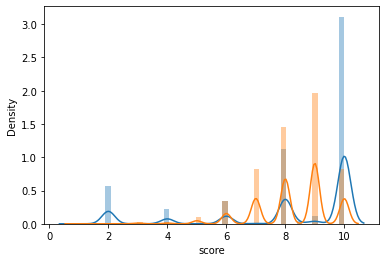

In [105]:
sns.distplot(df_cf['score']) # Distribution of original dataframe.

estimates = []
for i in test_pred:
    estimates.append(round(i[3])) # Testset scores and round them up.
    
sns.distplot(estimates) # Distribution of testset.

- <font color = 'green'> Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. <font color = 'green'> 
- <font color = 'green'> The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history. <font color = 'green'> 
- <font color = 'green'> From above distribution plot, we can notice model most of the error must have made in rating 2, 7 and between 9 and 10.

**<center>8. Try and recommend top 5 products for test users.</center>**

In [106]:
# using same test_users and test_item from Q6.
test_users = random.sample(users,k=10) # selecting 10 random test users. 
items = [x for x in set(x for x in df_ref['product_encode'])] # list of all items
recom = {}
for user in test_users:
    rating = []
    for item in items:
        prediction = algo.predict(user,item)
        if prediction[3] == 10:
            rating.append(prediction)
        elif prediction[3] == 9:
            rating.append(prediction)
        else:
            pass
            
    print("""
-------------------- userid - {} ----------------------
Top 1  - {}
Top 2  - {}
Top 3  - {}
Top 4  - {}
Top 5  - {}
            """.format(user,rating[0][1],rating[1][1],rating[2][1],rating[3][1],rating[4][1]))        


-------------------- userid - 497 ----------------------
Top 1  - 0
Top 2  - 3
Top 3  - 4
Top 4  - 23
Top 5  - 31
            

-------------------- userid - 32 ----------------------
Top 1  - 32
Top 2  - 48
Top 3  - 55
Top 4  - 57
Top 5  - 70
            

-------------------- userid - 557 ----------------------
Top 1  - 2
Top 2  - 19
Top 3  - 23
Top 4  - 24
Top 5  - 32
            

-------------------- userid - 244 ----------------------
Top 1  - 2
Top 2  - 6
Top 3  - 7
Top 4  - 11
Top 5  - 19
            

-------------------- userid - 565 ----------------------
Top 1  - 19
Top 2  - 48
Top 3  - 57
Top 4  - 74
Top 5  - 77
            

-------------------- userid - 71 ----------------------
Top 1  - 2
Top 2  - 19
Top 3  - 24
Top 4  - 32
Top 5  - 34
            

-------------------- userid - 451 ----------------------
Top 1  - 0
Top 2  - 2
Top 3  - 3
Top 4  - 7
Top 5  - 11
            

-------------------- userid - 59 ----------------------
Top 1  - 19
Top 2  - 32
Top 3  - 48
Top 

**<center>9. Try other techniques (Example: cross validation) to get better results.</center>**

In [107]:
# using Data from Q4.

algo_cv =  KNNWithMeans()
CV = cross_validate(algo_cv,data,measures=['RMSE'], cv=2,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    2.3271  2.3166  2.3218  0.0052  
Fit time          4.48    4.44    4.46    0.02    
Test time         66.21   65.22   65.71   0.50    


In [108]:
# Parameters for grid search 
param_grid = {
    'k': [10, 20],
    'sim_options': 
    {
        'name': ['msd', 'cosine'],
        'min_support': [1, 5],
        'user_based': [True],
    },
             }

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse"], cv=2) # preparing Grid search algorithm.
gs.fit(data)  # fitting the data

print(gs.best_score["rmse"]) # get best performance.
print(gs.best_params["rmse"]) # get best performance parameters.

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

**<center>10. In what business scenario you should use popularity based Recommendation Systems ?**</center>

- <font color = 'green'>Sometimes due to insufficiency of information on both user side (lack of details) as well as product/service side (lack of description), it becomes impossible for a model like content based or collaborative filtering to recommend something to the in such cases we can turn to popularity based recommendation system to recommend most popular or trending product/service.</font>

**<center>11. In what business scenario you should use CF based Recommendation Systems ?**</center>

- <font color = 'green'> When want to make recommendations to users on the basis of similarity of their characteristics with the other users and recommending the products/services that they have liked. This concept can fuhter be used with item, if a user likes a product/service the other items in list with similar charachteristics can be recommended.</font>

**<center>12. What other possible methods can you think of which can further improve the recommendation for different users ?</center>**

- <font color = 'green'> we can use collaborative filtering recommendation system. such that each characteristics of user is based on the features of product (like color, size, storage capacity, Battery capacity, camera, brands etc...) for more deeper understanding of customer requirments and likes rather than just depending upon details and description.</font>
- <font color = 'green'>we can use item based CF model for better item similarity.</font>
-<font color = 'green'>we can create hybrid recommendation system (content based and collaborative filtering).</font>